<a href="https://colab.research.google.com/github/vietxdang/iphs290_cultural_analytics/blob/main/Viet_sa_tweets_class_20211204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jon Chun
24 Oct 2021

# **Requirements**

* Must use **Chrome** browser (esp not Safari)
* Use only **plain text** files (no *.rtf, *.doc, etc)

# **Setup and Configuration**

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!git clone https://github.com/Deffro/text-preprocessing-techniques.git
%cd text-preprocessing-techniques
!ls -altr

Cloning into 'text-preprocessing-techniques'...
remote: Enumerating objects: 35, done.
remote: Total 35 (delta 0), reused 0 (delta 0), pack-reused 35
Unpacking objects: 100% (35/35), done.
/content/text-preprocessing-techniques
total 6720
drwxr-xr-x 1 root root    4096 Dec 16 15:31 ..
-rw-r--r-- 1 root root    2157 Dec 16 15:31 README.md
-rw-r--r-- 1 root root 6617121 Dec 16 15:31 corporaForSpellCorrection.txt
-rw-r--r-- 1 root root    5181 Dec 16 15:31 slang.txt
-rw-r--r-- 1 root root    8174 Dec 16 15:31 preprocess.py
-rw-r--r-- 1 root root  220883 Dec 16 15:31 ss-twitterfinal.txt
drwxr-xr-x 3 root root    4096 Dec 16 15:31 .
-rw-r--r-- 1 root root    8009 Dec 16 15:31 techniques.py
drwxr-xr-x 8 root root    4096 Dec 16 15:31 .git


In [3]:
!pip install -U pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 4.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.3 MB/s 
     |████████████████████████████████| 182 kB 70.2 MB/s 
     |████████████████████████████████| 7.6 MB 60.7 MB/s 


In [5]:
!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.4 MB/s 
     |████████████████████████████████| 175 kB 7.4 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=c3dee0d0182c7c8a1d3c5b62b669015b4bbc1608c6003e680bf1ed00acc4cd85
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [6]:
# This library contains a function that takes a string object, possibly containing non-ASCII characters, and returns a string

!pip install unidecode  # clean-text dependency

# Dealing with encodings
# import binascii

# !pip install chardet
# import chardet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 3.8 MB/s 


In [7]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 4.1 MB/s 
     |████████████████████████████████| 287 kB 35.1 MB/s 


In [8]:
!pip install python-slugify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install arrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 2.6 MB/s 


In [10]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 2.8 MB/s 


In [11]:
# Install optional libraries

# !pip install emoji
!pip install emoticon-fix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for emoticon-fix: filename=emoticon_fix-0.0.2-py3-none-any.whl size=3448 sha256=e2d058e07f41240fb8e3cc7d148a0e9499e7231be9840e251864abb31cdc74d2
  Stored in directory: /root/.cache/pip/wheels/a1/c9/0c/df1f040fdda294413121bf278d88dc3840a4b6f50579bb2681
Successfully built emoticon-fix


In [12]:
# Test

from emoticon_fix import emoticon_fix

text = 'test :) test :D test'
emoticon_fix.emoticon_fix(text)

'test Smile test Laugh test'

In [13]:
# Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import chardet
from pprint import pprint
import datetime 
import string
import re
import os

import arrow
from tqdm import tqdm
# from pprint import pprint
# from logging import error

from sklearn.preprocessing import StandardScaler
from scipy.signal import find_peaks
from scipy.special import softmax

import csv
import urllib.request

from google.colab import files

# Import functions to preprocess Tweets
# https://github.com/Deffro/text-preprocessing-techniques/blob/master/techniques.py


In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer
from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification, AutoTokenizer

In [15]:
# Import Twitter specific preprocessing files

from cleantext import clean

import contractions

from slugify import slugify

import emoji

from techniques import *

In [16]:
# Setup matplotlib

# %matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Globals

In [22]:
# Global Vars

novel_filename_str = ''
novel_title_str = ''
novel_raw_str = ''
novel_clean_str = ''

novel_lines_ls = []
novel_sentences_ls = []
novel_paragraphs_ls = []

# Main (Modin) DataFrame for Novel Sentiments
data_df = pd.DataFrame

TEXT_ENCODING = 'utf-8'

In [23]:
def verify_novel(anovel_raw_str, anovel_title_str, index_ends=500):
  '''
  INPUT: string in some stage of processing
  OUTPUT: display summary index_ends chars of header/footer for verification
  '''

  print(f'Novel Title: {anovel_title_str}')
  print(f'  Char Len: {len(anovel_raw_str)}')
  print('====================================\n')
  print(f'Beginning:\n\n {anovel_raw_str[:index_ends]}\n\n')
  print('\n------------------------------------')
  print(f'Ending:\n\n {anovel_raw_str[-index_ends:]}\n\n')

In [24]:
def save_text2txt_and_download(text_obj, file_suffix='_save.txt'):
  '''
  INPUT: text object and suffix to add to output text filename
  OUTPUT: Write text object to text file (both temp VM and download)
  '''

  if type(text_obj) == str:
    print('STEP 1. Processing String Object\n')
    str_obj = text_obj
  elif type(text_obj) == list:
    if (len(text_obj) > 0):
      if type(text_obj[0]) == str:
        print('STEP 1. Processing List of Strings Object\n')
        str_obj = "\n".join(text_obj)
      else:
        print('ERROR: Object is not an List of Strings [save_text2txt_and_download()]')
        return -1
    else:
      print('ERROR: Object is an empty List [save_text2txt_and_download()]')
      return -1
  else:
    print('ERROR: Object Type is neither String nor List [save_text2txt_and_download()]')
    return -1

  datetime_str = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  # out_filename = novel_name_str.split('.')[0] + '_' + datetime_str + file_suffix
  out_filename = novel_name_str.split('.')[0] + file_suffix

  # Write file to temporary VM filesystem
  print(f'STEP 2. Saving textfile to temporary VM file: {out_filename}\n')
  with open(out_filename, "w") as fp:
    fp.write(str_obj)

  # Download permanent copy of file
  print(f'STEP 3. Downloading permanent copy of textfile: {out_filename}\n')
  files.download(out_filename)

In [25]:
def save_df2csv_and_download(df_obj, file_suffix='_save.csv', nodate=True):
  '''
  INPUT: DataFrame object and suffix to add to output csv filename
  OUTPUT: Write DataFrame object to csv file (both temp VM and download)
  '''

  if isinstance(df_obj, pd.DataFrame):
    datetime_str = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    if nodate:
      out_filename = novel_name_str.split('.')[0] + file_suffix
    else:
      out_filename = novel_name_str.split('.')[0] + '_' + datetime_str + file_suffix
    # print(f'STEP 1. Saving DataFrame: {df_obj.__name__} to temporary VM file: {out_filename}\n') # Also, isinstance(obj, pd.DataFrame)
    print(f'STEP 1. Saving DataFrame to temporary VM file: {out_filename}\n')
    df_obj.to_csv(out_filename, index=False) 
  else:
    print(f'ERROR: Object is not a DataFrame [save_df2csv_and_download()]')
    return -1

  # Download permanent copy of file
  print(f'STEP 2. Downloading permanent copy of csvfile: {out_filename}\n')
  files.download(out_filename)


# Test

# save_df2csv_and_download(temp_df, '_bert-nlptown.txt')

In [26]:
def expand_contractions(input_str):
  '''
  INPUT: long string
  OUTPUT: long string with expanded contractions
  '''

  output_str = contractions.fix(input_str)

  return output_str

"""
# novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_ls]
novel_clean_ls = [contractions.fix(x) for x in novel_ls]
novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_clean_ls]
novel_clean_ls = [x.strip() for x in novel_clean_ls if len(x.strip()) > 1]
# novel_clean_ls = [re.sub(r"^[\"\']", "", x) for x in novel_clean_ls]  # re.sub("[\"\']", "", s)
# novel_clean_ls = [re.sub(r"[\"\']$", "", x) for x in novel_clean_ls]
novel_clean_ls = [x.encode('ascii',errors='ignore').decode() for x in novel_clean_ls]
# novel_bin = novel_clean_str.encode('ascii',errors='ignore')
# novel_clean_str = novel_bin.decode()

[f'[{x}]' for x in novel_clean_ls]
"""

'\n# novel_clean_ls = [re.sub(r\'[\n]+\', \' \', x).strip() for x in novel_ls]\nnovel_clean_ls = [contractions.fix(x) for x in novel_ls]\nnovel_clean_ls = [re.sub(r\'[\n]+\', \' \', x).strip() for x in novel_clean_ls]\nnovel_clean_ls = [x.strip() for x in novel_clean_ls if len(x.strip()) > 1]\n# novel_clean_ls = [re.sub(r"^["\']", "", x) for x in novel_clean_ls]  # re.sub("["\']", "", s)\n# novel_clean_ls = [re.sub(r"["\']$", "", x) for x in novel_clean_ls]\nnovel_clean_ls = [x.encode(\'ascii\',errors=\'ignore\').decode() for x in novel_clean_ls]\n# novel_bin = novel_clean_str.encode(\'ascii\',errors=\'ignore\')\n# novel_clean_str = novel_bin.decode()\n\n[f\'[{x}]\' for x in novel_clean_ls]\n'

# **Get Tweet Text - Pick ONE Option**

## OPTION (a): Scrape Twitter with snscrape

In [27]:
import snscrape
import snscrape.modules.twitter as sntwitter

# end_date = arrow.utcnow().format('YYYY-MM-DD')
# start_date = arrow.utcnow().shift(days=-7).format('YYYY-MM-DD')

# end_target_date = end_date
# start_target_date = start_date

# print(f'start_date: {start_date}')
# print(f'  end_date: {end_date}')

# local.format('YYYY-MM-DD HH:mm:ss ZZ')

# Set default search parameters
# today = datetime.date.today()
# end_date = today
# start_date = end_date

In [28]:
# import arrow

# end_date = arrow.utcnow().format('YYYY-MM-DD')
# start_date = utc.shift(days=-7).format('YYYY-MM-DD')

# print(f'start_date: {start_date}')
# print(f'  end_date: {end_date}')

# local.format('YYYY-MM-DD HH:mm:ss ZZ')

### INSTRUCTIONS

Pick a current topic since you can only search for Tweets starting **from today backwards** in time.

1. Search by username or Keyword/Hashtag
2. Spaces between multiple keywords act as AND
2. Tweets will be scraped from Now/Today backwards
3. (max_results) Tweets from the Now/Today back will be retrived
4. How far back in time (start_date) will be determined based upon:
  * The frequency of matching Tweets 
  * The max_results number of Tweets requested

In [29]:
#@title Twitter Search Type and Parameters

search_type = "keyword" #@param ["keyword", "username", "hashtag"]

search_term = "Tech layoff" #@param {type:"string"}

# start_target_date = '2022-11-01' #@param {type:"date"}

# end_target_date = '2022-11-14' #@param {type:"date"}

max_results = 10000 #@param {type:"slider", min:100, max:100000, step:100}



In [30]:
%%time

# EXECUTE SEARCH/SCRAPE

# NOTE: 2m15s on Sun 20221204 @ 14:26PM EST on Colab Pro T4 for 5k Tweets 
#       3m44s on Sun 20221204 @ 15:51PM EST on Colab Pro T4 for 5k Tweets 
#       3m22s on Tue 20221206 @ 02:26AM EST on Colab Pro T4 for 5k Tweets 
#       6m27s on Tue 20221206 @ 02:32AM EST on Colab Pro T4 for 10k Tweets 
#       5m34s on Tue 20221207 @ 16:12PM EST on Colab Pro T4 for 10k Tweets 
#      12m18s on Thu 20221208 @ 04:13AM EST on Colab Pro T4 for 30k Tweets
#      17m43s on Sun 20221211 @ 14:00PM EST on Colab Pro T4 for 30k Tweets
#       6m00s on Sun 20221211 @ 16:30PM EST on Colab Pro T4 for 10k Tweets
#      21m47s on Sun 20221211 @ 16:30PM EST on Colab Pro T4 for 30k Tweets
#      22m36s on Sun 20221211 @ 15:10PM EST on Colab Pro T4 for 30k Tweets
#      18m30s on Mon 20221213 @ 14:49PM EST on Colab Pro T4 for 30k Tweets
#      20m07s on Fri 20221216 @ 03:20PM EST on Colab Pro T4 for 30k Tweets
#    1h00m01s on Fri 20221216 @ 04:17PM EST on Colab Pro T4 for 100k Tweets

data_df = pd.DataFrame()

# Creating list to append tweet data to
tweet_ls = []

if ((search_type == "keyword") | (search_type == "hashtag")):
  print(f'EXECUTING: keyword search: [{search_term}]') #  from [{start_target_date}] to [{end_target_date}]\n')
  for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{search_term}').get_items()):
    if i >= max_results:
      break
    tweet_ls.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.retweetedTweet, tweet.quotedTweet])
  print(f'  {len(tweet_ls)} Tweets received')
  data_df = pd.DataFrame(tweet_ls, columns=['datetime','id','tweet','username','reply_ct','retweet_ct','like_ct','quote_ct','retweeted_id','quoted_id'])
  data_df.sort_values('datetime',inplace=True)

elif search_type == "username":
  print(f'EXECUTING: username search: [{search_term}]') #  from [{start_target_date}] to [{end_target_date}]\n')
  # Using TwitterSearchScraper to scrape data and append tweets to list
  for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'from:{search_term}').get_items()):
    if i >= max_results:
      break
    tweet_ls.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.retweetedTweet, tweet.quotedTweet])
  print(f'  {len(tweet_ls)} Tweets received')
  data_df = pd.DataFrame(tweet_ls, columns=['datetime','id','tweet','username','reply_ct','retweet_ct','like_ct','quote_ct','retweeted_id','quoted_id'])
  data_df.sort_values('datetime',inplace=True)

# elif search_type == "hashtag":
#   print(f'EXECUTING: hashtag search: [{search_term}] from [{start_date}] to [{end_date}]\n')

else:
  print(f"ERROR: Illegal search_type: {search_type}")

# Calculate Data Range
print(f'Tweet Dataset Retrieved:\n')

# start_retrieve_date = data_df.datetime.min().strftime('%Y-%m-%d-%H:%M:%S')
# end_retrieve_date = data_df.datetime.max().strftime('%Y-%m-%d-%H:%M:%S')
# start_retrieve_date = data_df.datetime.min().strftime('%Y%m%d_%H%M%S')
# end_retrieve_date = data_df.datetime.max().strftime('%Y%m%d_%H%M%S')
end_date = arrow.now().strftime('%Y%m%d_%H%M%S')

print(f' Raw Tweet Count: {data_df.shape[0]}')
print('\n')
# print(f'      First Date: {start_retrieve_date} (vs start_target_date: {start_target_date})')
print(f'      First Date: TBD')
print(f'       Last Date: {end_date} (vs end_target_date: {end_date})')
print('\n')
print(f'   ReTweet Count: {data_df.retweeted_id.count().sum()}')
print(f'    Quoted Count: {data_df.quoted_id.count().sum()}')
print('\n')
print(f'     Reply %: {100*data_df.reply_ct.count().sum()/data_df.shape[0]:.2f}%')
print(f'   ReTweet %: {100*data_df.retweet_ct.count().sum()/data_df.shape[0]:.2f}%')
print(f'      Like %: {100*data_df.like_ct.count().sum()/data_df.shape[0]:.2f}%')
print(f'     Quote %: {100*data_df.quote_ct.count().sum()/data_df.shape[0]:.2f}%')

print('\n')

EXECUTING: keyword search: [Tech layoff]
  10000 Tweets received
Tweet Dataset Retrieved:

 Raw Tweet Count: 10000


      First Date: TBD
       Last Date: 20221216_154043 (vs end_target_date: 20221216_154043)


   ReTweet Count: 0
    Quoted Count: 324


     Reply %: 100.00%
   ReTweet %: 100.00%
      Like %: 100.00%
     Quote %: 100.00%


CPU times: user 6.76 s, sys: 314 ms, total: 7.07 s
Wall time: 5min 39s


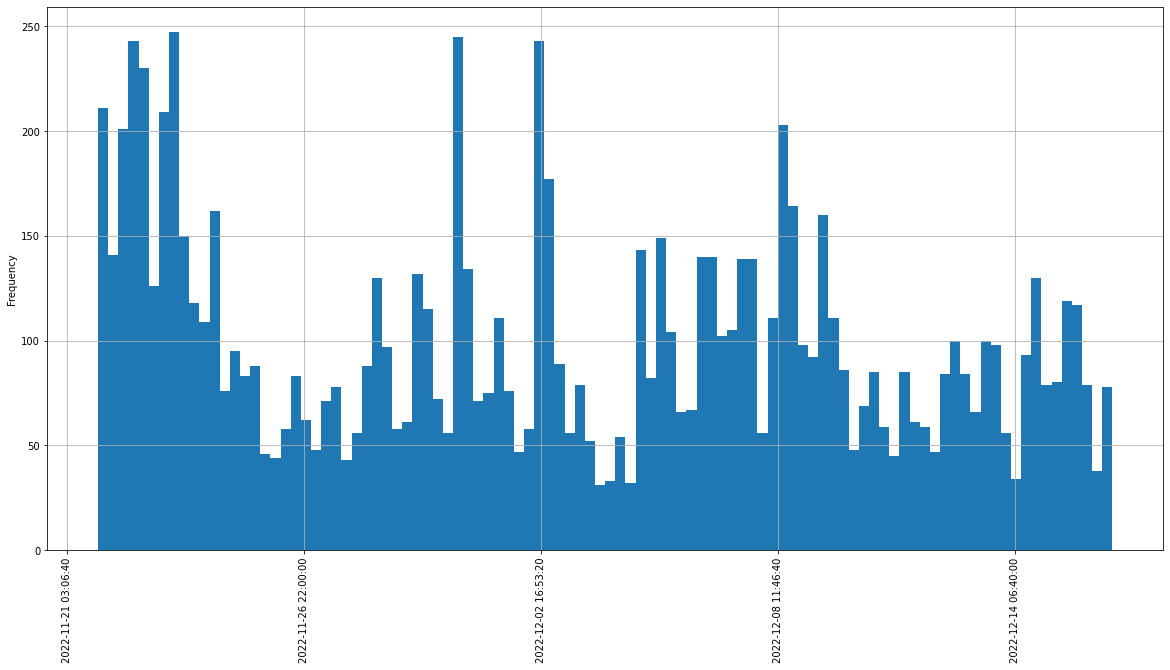

In [31]:
# Histogram of Tweet Counts over retrieved datetime range

bin_ct = 100

_ = fig, ax = plt.subplots()
_ = data_df["datetime"].astype(np.int64).plot.hist(bins=bin_ct, ax=ax)
_ = labels = ax.get_xticks().tolist()
_ = labels = pd.to_datetime(labels)
_ = ax.set_xticklabels(labels, rotation=90)
_ = plt.grid()
_ = plt.show();

In [32]:
# Drop unused columns
"""
if 'reply_ct' in data_df.columns:
  data_df.drop(columns=['reply_ct'], inplace=True)

if 'retweet_ct' in data_df.columns:
  data_df.drop(columns=['retweet_ct'], inplace=True)

if 'like_ct' in data_df.columns:
  data_df.drop(columns=['like_ct'], inplace=True)

if 'quote_ct' in data_df.columns:
  data_df.drop(columns=['quote_ct'], inplace=True)

if 'retweeted_id' in data_df.columns:
  data_df.drop(columns=['retweeted_id'], inplace=True)

if 'quoted_id' in data_df.columns:
  data_df.drop(columns=['quoted_id'], inplace=True)

data_df.info()
""";

In [33]:
# Get Start/End Date/Time

end_datetime = data_df['datetime'].min()
end_date_str = datetime.datetime.strftime(end_datetime, '%Y%m%d')
# end_date_str

print('\n')
end_time_str = datetime.datetime.strftime(end_datetime, '%H%M%S')
# end_time_str

end_date = end_date_str
end_time = end_time_str

end_date = end_date_str
end_time = end_time_str

start_datetime = data_df['datetime'].max()
start_date_str = datetime.datetime.strftime(start_datetime, '%Y%m%d')
# start_date_str

print('\n')
start_time_str = datetime.datetime.strftime(start_datetime, '%H%M%S')
# start_time_str

start_date = start_date_str
start_time = start_time_str

print(f'Start: {start_date}_{start_time}')
print(f'  End: {end_date}_{end_time}')





Start: 20221216_153341
  End: 20221121_212715


In [34]:
#       6m27s on Tue 20221206 @ 02:32AM EST on Colab Pro T4 getting 10k Tweets 
#       6m27s on Tue 20221206 @ 02:32AM EST on Colab Pro T4 getting 10k Tweets 
data_df.head()

,datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id
9999,2022-11-21 21:27:15+00:00,1594804661432655873,H-1B Visa Holders Scramble for Jobs After 2022...,hn_frontpage,0,0,0,0,None,None
9998,2022-11-21 21:28:36+00:00,1594804998516383747,H-1B Visa Holders Scramble for Jobs After 2022...,knelsonvsi,0,0,0,0,None,None
9997,2022-11-21 21:29:04+00:00,1594805117571702791,H-1B Visa Holders Scramble for Jobs After 2022...,terrypferguson,0,0,0,0,None,None
9996,2022-11-21 21:30:08+00:00,1594805384098750496,"#CorpBias\nAmid mass layoffs, the Big Tech dre...",borderObserver,0,0,0,0,None,None
9995,2022-11-21 21:30:31+00:00,1594805480739708960,H-1B Visa Holders Scramble for Jobs After 2022...,radoncnotes,0,0,0,0,None,None


In [35]:
# Save raw tweets

# end_date = end_date.split('.')[0]  # If cells executed out of order, this can grow a suffix .csv.csv...

filename_tweets = f'tweets_raw_{slugify(search_term, separator="")}_{start_date}_{start_time}_{end_date}_{end_time}.csv'
print(f'Saving to file: {filename_tweets}')

data_df.to_csv(filename_tweets, index=False, encoding='utf-8', errors='strict')

files.download(filename_tweets)

Saving to file: tweets_raw_techlayoff_20221216_153341_20221121_212715.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## OPTION (b): Upload Raw Textfile

RECOMMEND that you don't save/read twitter_raw_*csv datafiles
Instead, just run entire notebook from start to finish without any interruption.

In [ ]:
%%time

# NOTE: 1m07s

# Upload Plain Text File
uploaded = files.upload()
datafile_name = ''

# NOTE: Allows for multiple file uploads, will only process the last
#       Left in for future feature addition (processing multiple files at once)

print(f"Tweet raw datafile should have been created with this notebook with the filename format:")
print(f"   tweets_raw_<search_term>_<start_date>-<end_date>.csv")
print(f"   e.g. 'tweets_raw_elonmusk_2022-10-01_2022-12-04.csv'\n\n")

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  datafile_name = fn

# Parse raw tweet datafile filename to extract key search parameters
try:
  word1, word2, file_search_term, file_start_date, file_start_time, file_end_date, file_end_time = datafile_name.split('_')
  if (word1 =='tweets') & (word2 == 'raw'):
    search_term = file_search_term
    start_date = file_start_date
    end_date = file_end_date.split('.')[0]  # trim '.csv' suffix
    print(f'\n\nSearch Term: {search_term}\n  start_date: {start_date}\n  end_date: {end_date}\n\n')
  else:
    print(f'ILLEGAL FILENAME: {datafile_name}\n  Tweets datafile name must begin with prefix [tweets_raw_]')
except:
  print(f'ILLEGAL FILENAME: {datafile_name}\n  cannot parse Tweets datafile name')


# Parse out search dates based upon filename

tweet_str, text_state_str, search_str, start_date, start_time, end_date, end_time = datafile_name.split('_')
end_time = ''.join(end_time.split('.')[:-1])

print(f'tweet_str: {tweet_str}')
print(f'text_state_str: {text_state_str}')
print(f'search_str: {search_str}')
print(f'start_date: {start_date}')
print(f'start_time: {start_time}')
print(f'end_date: {end_date}')
print(f'end_time: {end_time}')

Saving tweets_raw_juansoto_20221216_081405_20220912_115531.csv to tweets_raw_juansoto_20221216_081405_20220912_115531 (1).csv
Tweet raw datafile should have been created with this notebook with the filename format:
   tweets_raw_<search_term>_<start_date>-<end_date>.csv
   e.g. 'tweets_raw_elonmusk_2022-10-01_2022-12-04.csv'


User uploaded file "tweets_raw_juansoto_20221216_081405_20220912_115531.csv" with length 5768909 bytes


Search Term: juansoto
  start_date: 20221216
  end_date: 20220912


tweet_str: tweets
text_state_str: raw
search_str: juansoto
start_date: 20221216
start_time: 081405
end_date: 20220912
end_time: 115531
CPU times: user 527 ms, sys: 108 ms, total: 634 ms
Wall time: 1min 6s


In [ ]:
!head -n 5 $datafile_name

datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id
2022-09-12 11:55:31+00:00,1569293626135437312,"Lexus of Kendall is my go to dealer, your team knows how to provide an excellent  customer service and make a lifetime relation with the customer. Juan Soto and the salesman dedication , (forgot his name) till the last minute explaining and going above and beyond in their excelle",lexusofkendall,0,0,0,0,,
2022-09-12 12:20:25+00:00,1569299893495242754,Juan Soto AUTOGRAPH 2022 Topps  #ad #sportscards https://t.co/gsSMMijRDM,cardwatch123,0,0,0,0,,
2022-09-12 12:22:49+00:00,1569300499106787331,"#randombaseball
Juan Soto performs a sacrifice bunt off Merrill Kelly. Lars Nootbaar reaches 3B.


In [ ]:
# DEBUG

# Reading and Write File to Filter out Illegal utf-8 characters
# https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c
"""
import codecs

with codecs.open(datafile_name, 'r', encoding='utf-8', errors='ignore') as fp:
  datafile_str = fp.read()

print(datafile_str[:1000])

# os.copy back up with timestamp
import shutil

datetime_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

datafile_root = ' '.join(datafile_name.split('.')[:-1])
datafile_backup = f"{datafile_root}_backup_{datetime_str}.csv"

shutil.copy2(datafile_name, datafile_backup) # complete target filename given

# overwrite clean/filtered data to original filename
with open(datafile_name, "w", encoding='utf-8') as fp:
  fp.write(datafile_str)

os.listdir()
""";

In [ ]:
# DEBUG

# Another approach to overcome pd.read_csv() read errors

"""
import io   

TESTDATA=col1;col2;col3
1;4.4;99
2;4.5;200
3;4.7;65
4;3.2;140


df = pd.read_csv(io.StringIO(TESTDATA), sep=";")
# df = pd.read_csv(io.StringIO(datafile_str), sep=",")
print(df)
""";

In [ ]:
# Read raw tweet datafile into DataFrame 'data'

# NOTE: Tweets have many encoding and other parsing errors so
#       just do basic read and then try to set dtype

try:
  headers = ['datetime','id','tweet','username','reply_ct','retweet_ct','like_ct','quote_ct','retweeted_id','quoted_id']
  dtypes_dt = {'datetime': str,
            'id': int,
            'tweet': str,
            'username':str,
            'reply_ct':int,
            'retweet_ct':int,
            'like_ct':int,
            'quote_ct':int,
            'retweeted_id':str,
            'quoted_id':str}
  parse_dates = ['datetime']
  data_df = pd.read_csv(datafile_name, index_col=None) # , dtype=dtypes_dt) # , skiprows=[0]) # , names=headers) # , dtype=dtypes) # , parse_dates=parse_dates, index_col=None, on_bad_lines='ignore') # encoding='utf-8', on_bad_lines='ignore')
  # data_df = pd.read_csv(datafile_name)
  data_df.head()
  data_df.info()
  print(f"SUCCESS: Tweets datafile [{datafile_name}] read into DataFrame 'data_df'")
except:
  print(f'ERROR: Tweets datafile [{datafile_name}] cannot be read by pd.read_csv')

,datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id
0,2022-09-12 11:55:31+00:00,1569293626135437312,"Lexus of Kendall is my go to dealer, your team...",lexusofkendall,0,0,0,0,NaN,NaN
1,2022-09-12 12:20:25+00:00,1569299893495242754,Juan Soto AUTOGRAPH 2022 Topps #ad #sportscar...,cardwatch123,0,0,0,0,NaN,NaN
2,2022-09-12 12:22:49+00:00,1569300499106787331,#randombaseball\nJuan Soto performs a sacrific...,corbin_barrels,0,0,0,0,NaN,NaN
3,2022-09-12 12:46:29+00:00,1569306455664214016,#MLB⚾️🇩🇴 Dominicanos con más jonrones en grand...,GUZMAN2000MN,2,4,14,1,NaN,NaN
4,2022-09-12 12:51:05+00:00,1569307612423888896,2017 Bowman Chrome Juan Soto BC #ad #baseballc...,FinderCard,0,0,0,0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      30000 non-null  object 
 1   id            30000 non-null  int64  
 2   tweet         30000 non-null  object 
 3   username      30000 non-null  object 
 4   reply_ct      30000 non-null  int64  
 5   retweet_ct    30000 non-null  int64  
 6   like_ct       30000 non-null  int64  
 7   quote_ct      30000 non-null  int64  
 8   retweeted_id  0 non-null      float64
 9   quoted_id     1943 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.3+ MB
SUCCESS: Tweets datafile [tweets_raw_juansoto_20221216_081405_20220912_115531.csv] read into DataFrame 'data_df'


In [ ]:
# Drop unused columns

if 'reply_ct' in data_df.columns:
  data_df.drop(columns=['reply_ct'], inplace=True)

if 'retweet_ct' in data_df.columns:
  data_df.drop(columns=['retweet_ct'], inplace=True)

if 'like_ct' in data_df.columns:
  data_df.drop(columns=['like_ct'], inplace=True)

if 'quote_ct' in data_df.columns:
  data_df.drop(columns=['quote_ct'], inplace=True)

if 'retweeted_id' in data_df.columns:
  data_df.drop(columns=['retweeted_id'], inplace=True)

if 'quoted_id' in data_df.columns:
  data_df.drop(columns=['quoted_id'], inplace=True)

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  30000 non-null  object
 1   id        30000 non-null  int64 
 2   tweet     30000 non-null  object
 3   username  30000 non-null  object
dtypes: int64(1), object(3)
memory usage: 937.6+ KB


In [ ]:
# DEBUG

# data_df.iloc[8740:8750].datetime

In [ ]:
# Try to convert Tweet text to string (raise error if incompatible encoding)

data_df['text_raw'] = data_df['tweet']
data_df['text_raw'] = data_df['text_raw'].astype('string', errors='raise')
data_df['username'] = data_df['username'].astype('string', errors='raise')
data_df['tweet'] = data_df['tweet'].astype('string', errors='raise')
data_df['datetime'] = pd.to_datetime(data_df['datetime'], errors='coerce')
data_df = data_df.dropna(subset=['datetime'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   datetime  30000 non-null  datetime64[ns, UTC]
 1   id        30000 non-null  int64              
 2   tweet     30000 non-null  string             
 3   username  30000 non-null  string             
 4   text_raw  30000 non-null  string             
dtypes: datetime64[ns, UTC](1), int64(1), string(3)
memory usage: 1.1 MB


In [ ]:
# Drop any row that have at any NaN

data_df.dropna(inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   datetime  30000 non-null  datetime64[ns, UTC]
 1   id        30000 non-null  int64              
 2   tweet     30000 non-null  string             
 3   username  30000 non-null  string             
 4   text_raw  30000 non-null  string             
dtypes: datetime64[ns, UTC](1), int64(1), string(3)
memory usage: 1.1 MB


In [ ]:
# DEBUG

# df is the DataFrame, and column_list is a list of columns as strings (e.g ["col1","col2","col3"])
# dependencies: pandas

def coerce_df_columns_to_string(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_string, errors='coerce')

# coerce_df_columns_to_string(data_df, ['tweet','username'])
# data_df.info()

In [ ]:
start_date

'20221216'

In [ ]:
# Calculate Data Range
print(f'Tweet Dataset Retrieved:\n')

# start_retrieve_date = data_df.datetime.min().strftime('%Y-%m-%d-%H:%M:%S')
# end_retrieve_date = data_df.datetime.max().strftime('%Y-%m-%d-%H:%M:%S')
start_retrieve_date = data_df.datetime.min() # .strftime('%Y%m%d_%H%M%S')
end_retrieve_date = data_df.datetime.max() # .strftime('%Y%m%d_%H%M%S')

print(f' Raw Tweet Count: {data_df.shape[0]}')
print('\n')
print(f'      First Date: {start_date}') #  (vs start_target_date: {start_date})')
print(f'       Last Date: {end_date}') # ' (vs end_target_date: {end_date})')
# print('\n')
# print(f'   ReTweet Count: {data_df.retweeted_id.count().sum()}')
# print(f'    Quoted Count: {data_df.quoted_id.count().sum()}')
# print('\n')
# print(f'     Reply %: {100*data_df.reply_ct.count().sum()/data_df.shape[0]:.2f}%')
# print(f'   ReTweet %: {100*data_df.retweet_ct.count().sum()/data_df.shape[0]:.2f}%')
# print(f'      Like %: {100*data_df.like_ct.count().sum()/data_df.shape[0]:.2f}%')
# print(f'     Quote %: {100*data_df.quote_ct.count().sum()/data_df.shape[0]:.2f}%')

print('\n')

Tweet Dataset Retrieved:

 Raw Tweet Count: 1014


      First Date: 2007-08-24 13:18:18+00:00 (vs start_target_date: 20070824)
       Last Date: 2022-12-13 08:07:34+00:00 (vs end_target_date: 20221213)




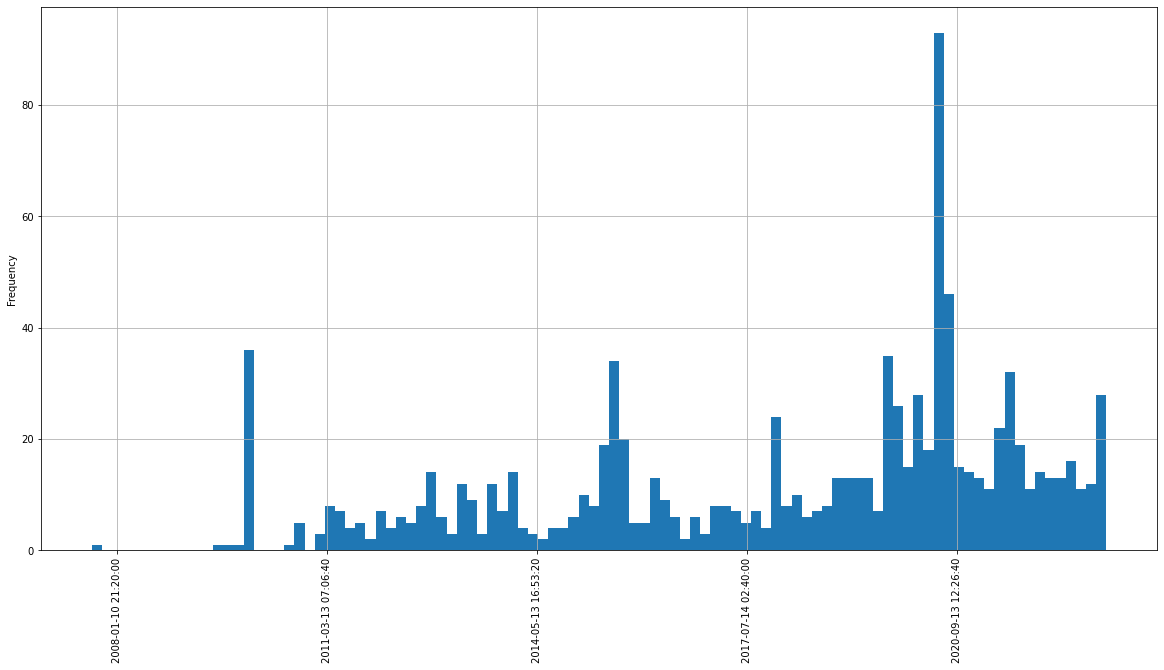

In [ ]:
# Histogram of Tweet Counts over retrieved datetime range

# CUSTOMIZE
bin_ct = 100

_ = fig, ax = plt.subplots()
_ = data_df["datetime"].astype(np.int64).plot.hist(bins=bin_ct, ax=ax)
_ = labels = ax.get_xticks().tolist()
_ = labels = pd.to_datetime(labels)
_ = ax.set_xticklabels(labels, rotation=90)
_ = plt.grid()
_ = plt.show();

# **Clean Tweets** - Pick ONE Option

Strategy:
1. Convert Unicode emojis to standard english words
2. Convert Emojicons (text/punctuation) to standard english words 
3. Convert Slang to standard english

Goals:
1. plain text of text_noemoji for Transformer models
2. simplified text of text_clean for simplier models (e.g. lexicon, stat ML)

## OPTION (a): Clean Tweets

In [37]:
data_df.head()
data_df.info()

,datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id
9999,2022-11-21 21:27:15+00:00,1594804661432655873,H-1B Visa Holders Scramble for Jobs After 2022...,hn_frontpage,0,0,0,0,None,None
9998,2022-11-21 21:28:36+00:00,1594804998516383747,H-1B Visa Holders Scramble for Jobs After 2022...,knelsonvsi,0,0,0,0,None,None
9997,2022-11-21 21:29:04+00:00,1594805117571702791,H-1B Visa Holders Scramble for Jobs After 2022...,terrypferguson,0,0,0,0,None,None
9996,2022-11-21 21:30:08+00:00,1594805384098750496,"#CorpBias\nAmid mass layoffs, the Big Tech dre...",borderObserver,0,0,0,0,None,None
9995,2022-11-21 21:30:31+00:00,1594805480739708960,H-1B Visa Holders Scramble for Jobs After 2022...,radoncnotes,0,0,0,0,None,None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9999 to 0
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      10000 non-null  datetime64[ns, UTC]
 1   id            10000 non-null  int64              
 2   tweet         10000 non-null  object             
 3   username      10000 non-null  object             
 4   reply_ct      10000 non-null  int64              
 5   retweet_ct    10000 non-null  int64              
 6   like_ct       10000 non-null  int64              
 7   quote_ct      10000 non-null  int64              
 8   retweeted_id  0 non-null      object             
 9   quoted_id     324 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 859.4+ KB


In [38]:
tweet_test_ls = [
    "?RT @justinbiebcr: The bigger the better....if you know what I mean ;)	negative",
    "Your busy schedule might not leave you a lot of room today for... More for Scorpio http://twittascope.com/twittascope/?sign=8",
    "In ny wif @DJWALLAH and the Heavy Hitter crew... shout to @freddyphh for looking real gay in the camera...lol...",
    "I finished my fourth can of Coke WTF.",
    "I don't give a shit about Valentines, i'm pissed that i have no access to the new Uffie album!!",
    "I got my pops whip right now and this nigga aint got NOOO heat. Smh",
    "RT @SunshynAndPain My tummy hurts =[ {hope you feel better} :) ;)",
    "I feel good, I knew that I would now ✋🏽😜🤚🏽"
]

In [39]:
def clean_basic_str(dirty_str):
  '''
  STEP 1: Basic tweet text preprocessing
  '''

  contraction_expanded_str = contractions.fix(dirty_str)

  clean_str = clean(contraction_expanded_str,
      fix_unicode=True,               # fix various unicode errors
      to_ascii=True,                  # transliterate to closest ASCII representation
      lower=False,                     # lowercase text
      no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
      no_urls=True,                  # replace all URLs with a special token
      no_emails=True,                # replace all email addresses with a special token
      no_phone_numbers=True,         # replace all phone numbers with a special token
      no_numbers=False,               # replace all numbers with a special token
      no_digits=False,                # replace all digits with a special token
      no_currency_symbols=False,      # replace all currency symbols with a special token
      no_punct=False,                 # remove punctuations
      # replace_with_punct="",          # instead of removing punctuations you may replace them
      # replace_with_url="<URL>",
      # replace_with_email="<EMAIL>",
      # replace_with_phone_number="<PHONE>",
      # replace_with_number="<NUMBER>",
      # replace_with_digit="0",
      # replace_with_currency_symbol="<CUR>",
      lang="en"                       # set to 'de' for German special handling
  )

  # Replace all new lines/returns with single whitespace
  clean_str = ' '.join(clean_str.split())
  # clean_str = clean_str.replace('\n\r', ' ')
  # clean_str = clean_str.replace('\n', ' ')
  # clean_str = clean_str.replace('\r', ' ')
  # clean_str = ' '.join(clean_str.split())

  # Strip unpaired leading/trailing quotes
  if (clean_str.count('"') % 2 == 1):
    clean_str = clean_str.strip('"')
  if (clean_str.count("'") % 2 == 1):
    clean_str = clean_str.strip("'")

  return clean_str 

# Test

clean_basic_str("This \n\n\n is a very dirty DIRTY StrInG!!")
clean_basic_str('"up!')
clean_basic_str('"Watch out!" he said.')

'This is a very dirty DIRTY StrInG!!'

'up!'

'"Watch out!" he said.'

In [40]:
def translate_emoji(raw_str):
  '''
  STEP 2: Convert emoji/emoticons to plain english words
  '''

  # Translate Unicode icon emoji to english words
  emoji2txt_str = emoji.demojize(raw_str) # , delimiters='') # .replace('_',' '))

  # Translate text/punctuation emojicons [e.g. ;) :smirk:] to english words
  emoji2txt_str = emoticon_fix.emoticon_fix(emoji2txt_str)

  # Perform basic text preprocessing
  emoji2txt_str = clean_basic_str(emoji2txt_str)  # Execute STEP 1: basic preprocessing
  emoji2txt_str = emoji2txt_str.replace('_', ' ')
  emoji2txt_str = emoji2txt_str.replace(':',' ')
  emoji2txt_str = " ".join(emoji2txt_str.split())
  
  return emoji2txt_str

# Test

translate_emoji("I feel good, I knew that I would now ✋🏽😜🤚🏽")

'I feel good , I knew that I would now raised hand medium skin tone winking face with tongue raised back of hand medium skin tone'

In [41]:
# Test

emoticon_fix.emoticon_fix('Hi :o :) ;)').replace('_',' ')

'Hi : o Smile Smirk'

In [42]:
# Test clean_basic_str()

clean_basic_ls = []

for i,atweet in enumerate(tweet_test_ls):
  clean_tweet = clean_basic_str(atweet)
  print(f"ORIGINAL: {atweet}\n   CLEAN: {clean_tweet}\n\n")
  # print(f"    CODE: {chardet.detect(atweet)}")
  clean_basic_ls.append(clean_tweet)

ORIGINAL: ?RT @justinbiebcr: The bigger the better....if you know what I mean ;)	negative
   CLEAN: ?RT @justinbiebcr: The bigger the better....if you know what I mean ;) negative


ORIGINAL: Your busy schedule might not leave you a lot of room today for... More for Scorpio http://twittascope.com/twittascope/?sign=8
   CLEAN: Your busy schedule might not leave you a lot of room today for... More for Scorpio <URL>


ORIGINAL: In ny wif @DJWALLAH and the Heavy Hitter crew... shout to @freddyphh for looking real gay in the camera...lol...
   CLEAN: In ny wif @DJWALLAH and the Heavy Hitter crew... shout to @freddyphh for looking real gay in the camera...lol...


ORIGINAL: I finished my fourth can of Coke WTF.
   CLEAN: I finished my fourth can of Coke WTF.


ORIGINAL: I don't give a shit about Valentines, i'm pissed that i have no access to the new Uffie album!!
   CLEAN: I do not give a shit about Valentines, i am pissed that i have no access to the new Uffie album!!


ORIGINAL: I got my 

In [43]:
# Required for STEP 3 (techniques.py): NLTK for tokenization

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [44]:
# Required for STEP 3: spaCy for lemmatization

import spacy

nlp = spacy.load('en_core_web_sm')

# Test

doc = nlp('did displaying words')
print(" ".join([token.lemma_ for token in doc]))

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


do display word


In [45]:
# Step 3: Advanced Tweet Preprocessing on text_intermed with techniques.py
# https://github.com/Deffro/text-preprocessing-techniques/blob/master/preprocess.py
# TODO: rip this out entirely and replace inline

def clean_adv_str(text_str):
  '''
  STEP 3: Advanced Tweet text preprocessing
  '''
  
  text_str = text_str.strip()

  # Convert encoding to printable ASCII
  # text_str = text_str.encode("ascii", "ignore")  

  # Remove URLs
  text_str = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text_str)
  text_str = re.sub(r'#([^\s]+)', r'\1', text_str)

  # Remove @User
  text_str = re.sub('@[^\s]+',' ',text_str)

  # Remove # infront of hash tag words
  text_str = re.sub(r'#([^\s]+)', r'\1', text_str)

  # totalSlangs = 0
  # totalSlangsFound = []
  temp_slangs, temp_slangsFound = countSlang(text_str)
  # totalSlangs += temp_slangs # total slangs for all sentences
  # for word in temp_slangsFound:
  #     totalSlangsFound.append(word) # all the slangs found in all sentences
 
  text_str = replaceSlang(text_str) # Technique 2: replaces slang words and abbreviations with their equivalents


  text_str = replaceContraction(text_str) # Technique 3: replaces contractions to their equivalents


  # Remove Numbers
  text_str = removeNumbers(text_str) # Technique 4: remove integers from text

  # Remove Punctuation
  # text_str = removePunctuation(text_str) 
  # text_str = text_str.decode('ascii')

  doc = nlp(text_str)
  # Convert tokens to lemmas and filter out stopwords
  text_str = (" ".join([token.lemma_ for token in doc if not token.is_stop]))
  # Convert to lowercase
  text_str = text_str.lower()
  # Filter out punctuation
  text_str = text_str.translate(str.maketrans('', '', string.punctuation))
  # Collapse multiple whitespaces
  text_str = " ".join(text_str.split())

  return text_str

In [46]:
%%time

# NOTE:    42s on Sun 20221204 @ 15:44PM EST on Colab Pro T4 on 5k Tweets
#        2m10s on Tue 20221204 @ 03:15AM EST on Colab Pro T4 on 10k Tweets
#        6m30s on Fri 20221208 @ 04:28AM EST on Colab Pro T4 on 30k Tweets
#        5m03s on Sun 20221211 @ 14:15PM EST on Colab Pro T4 on 30k Tweets
#        6m14s on Sun 20221211 @ 14:15PM EST on Colab Pro T4 on 30k Tweets
#        6m30s on Mon 20221214 @ 00:14AM EST on Colab Pro CPU on 30k Tweets
#        4m40s on Fri 20221216 @ 03:52AM EST on Colab Pro CPU on 30k Tweets


# Create data_df to hold text sentences and corresponding sentiment values

# Step 1-2: Convert unicode emojis and text/punctuation of emojicons to plain english words for all models (save in text_noemoji)

# data_df = pd.DataFrame({'text_raw': novel_sentences_ls})

# STEP 1: Basic Twitter text preprocessing
# currently embedded within translate_emoji() due to emoji2txt additions ':' and '_' removal
data_df['text_raw'] = data_df['tweet'] # .apply(lambda x: str(x))

# STEP 2: Translate Unicode icon emoji and text/punctuation emoticons to english words
data_df['text_noemoji'] = data_df['text_raw'].apply(lambda x: translate_emoji(str(x))) 
# This 'text_noemoji' version of tweet is fed into advanced SOTA Transformer models that can exploit richer context

# STEP 3: Advanced Twitter text preprocessing
data_df['text_clean'] = data_df['text_noemoji'].apply(lambda x: clean_adv_str(x)) 
# This 'text_clean' version of tweet is fed into simplier sentiment models that depend more on normalized feature engineering (e.g. lexicons, stat ML)

data_df.iloc[50:70]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9999 to 0
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      10000 non-null  datetime64[ns, UTC]
 1   id            10000 non-null  int64              
 2   tweet         10000 non-null  object             
 3   username      10000 non-null  object             
 4   reply_ct      10000 non-null  int64              
 5   retweet_ct    10000 non-null  int64              
 6   like_ct       10000 non-null  int64              
 7   quote_ct      10000 non-null  int64              
 8   retweeted_id  0 non-null      object             
 9   quoted_id     324 non-null    object             
 10  text_raw      10000 non-null  object             
 11  text_noemoji  10000 non-null  object             
 12  text_clean    10000 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(5), object(7)
memory usage: 1

In [47]:
data_df.isna().sum()

datetime            0
id                  0
tweet               0
username            0
reply_ct            0
retweet_ct          0
like_ct             0
quote_ct            0
retweeted_id    10000
quoted_id        9676
text_raw            0
text_noemoji        0
text_clean          0
dtype: int64

In [48]:
# Drop unused columns

if 'reply_ct' in data_df.columns:
  data_df.drop(columns=['reply_ct'], inplace=True)

if 'retweet_ct' in data_df.columns:
  data_df.drop(columns=['retweet_ct'], inplace=True)

if 'like_ct' in data_df.columns:
  data_df.drop(columns=['like_ct'], inplace=True)

if 'quote_ct' in data_df.columns:
  data_df.drop(columns=['quote_ct'], inplace=True)

if 'retweeted_id' in data_df.columns:
  data_df.drop(columns=['retweeted_id'], inplace=True)

if 'quoted_id' in data_df.columns:
  data_df.drop(columns=['quoted_id'], inplace=True)

data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9999 to 0
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      10000 non-null  datetime64[ns, UTC]
 1   id            10000 non-null  int64              
 2   tweet         10000 non-null  object             
 3   username      10000 non-null  object             
 4   text_raw      10000 non-null  object             
 5   text_noemoji  10000 non-null  object             
 6   text_clean    10000 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 625.0+ KB


In [49]:
data_df.dropna(inplace=True)
data_df.head()
data_df.info()

,datetime,id,tweet,username,text_raw,text_noemoji,text_clean
9999,2022-11-21 21:27:15+00:00,1594804661432655873,H-1B Visa Holders Scramble for Jobs After 2022...,hn_frontpage,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs l u...
9998,2022-11-21 21:28:36+00:00,1594804998516383747,H-1B Visa Holders Scramble for Jobs After 2022...,knelsonvsi,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs url
9997,2022-11-21 21:29:04+00:00,1594805117571702791,H-1B Visa Holders Scramble for Jobs After 2022...,terrypferguson,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs url
9996,2022-11-21 21:30:08+00:00,1594805384098750496,"#CorpBias\nAmid mass layoffs, the Big Tech dre...",borderObserver,"#CorpBias\nAmid mass layoffs, the Big Tech dre...","#CorpBias Amid mass layoffs , the Big Tech dre...",corpbias amid mass layoff big tech dream job l...
9995,2022-11-21 21:30:31+00:00,1594805480739708960,H-1B Visa Holders Scramble for Jobs After 2022...,radoncnotes,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs url


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9999 to 0
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      10000 non-null  datetime64[ns, UTC]
 1   id            10000 non-null  int64              
 2   tweet         10000 non-null  object             
 3   username      10000 non-null  object             
 4   text_raw      10000 non-null  object             
 5   text_noemoji  10000 non-null  object             
 6   text_clean    10000 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 625.0+ KB


In [50]:
"""
type(start_retrieve_date)
start_retrieve_date.year
start_retrieve_date.month
start_retrieve_date.day
type(start_retrieve_date.strftime('%Y%m%d'))
""";

In [51]:
# Save 

# filename_clean_tweets = f"tweets_clean_{slugify(search_term, separator='')}_{start_retrieve_date.strftime('%Y%m%d')}_{start_time}_{end_retrieve_date.strftime('%Y%m%d')}_{end_time}.csv"
filename_clean_tweets = f"tweets_clean_{slugify(search_term, separator='')}_{start_date}_{start_time}_{end_date}_{end_time}.csv"
print(f'Saving to file: {filename_clean_tweets}')

data_df.to_csv(filename_clean_tweets, index=False)

files.download(filename_clean_tweets)

Saving to file: tweets_clean_techlayoff_20221216_153341_20221121_212715.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## OPTION (b): Upload Clean Tweets

In [ ]:
%%time

# NOTE: 1m07s

# Upload Plain Text File
uploaded = files.upload()
datafile_name = ''

# NOTE: Allows for multiple file uploads, will only process the last
#       Left in for future feature addition (processing multiple files at once)

print(f"Tweet raw datafile should have been created with this notebook with the filename format:")
print(f"   tweets_raw_<search_term>_<start_date>-<end_date>.csv")
print(f"   e.g. 'tweets_raw_elonmusk_2022-10-01_2022-12-04.csv'\n\n")

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  datafile_name = fn

# Parse raw tweet datafile filename to extract key search parameters
try:
  word1, word2, file_search_term, file_start_date, file_start_time, file_end_date, file_end_time = datafile_name.split('_')
  if (word1 =='tweets') & (word2 == 'raw'):
    search_term = file_search_term
    start_date = file_start_date
    end_date = file_end_date.split('.')[0]  # trim '.csv' suffix
    print(f'\n\nSearch Term: {search_term}\n  start_date: {start_date}\n  end_date: {end_date}\n\n')
  else:
    print(f'ILLEGAL FILENAME: {datafile_name}\n  Tweets datafile name must begin with prefix [tweets_raw_]')
except:
  print(f'ILLEGAL FILENAME: {datafile_name}\n  cannot parse Tweets datafile name')


# Parse out search dates based upon filename

tweet_str, text_state_str, search_str, start_date, start_time, end_date, end_time = datafile_name.split('_')
end_time = ''.join(end_time.split('.')[:-1])

print(f'tweet_str: {tweet_str}')
print(f'text_state_str: {text_state_str}')
print(f'search_str: {search_str}')
print(f'start_date: {start_date}')
print(f'start_time: {start_time}')
print(f'end_date: {end_date}')
print(f'end_time: {end_time}')

In [ ]:
!head -n 5 $datafile_name

In [ ]:
# DEBUG

"""
# Read raw tweet datafile into DataFrame 'data'
try:
  data = pd.read_csv(datafile_name, encoding='utf-8', encoding_errors='ignore') # , on_bad_lines='skip', error_bad_lines=False)
  print(f"SUCCESS: Tweets datafile read into DataFrame 'data'")
except:
  print(f'ERROR: Tweets datafile cannot be read by pd.read_csv')
""";

In [ ]:
# DEBUG

# Reading and Write File to Filter out Illegal utf-8 characters
# https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c
"""
import codecs

with codecs.open(datafile_name, 'r', encoding='utf-8', errors='ignore') as fp:
  datafile_str = fp.read()

print(datafile_str[:1000])

# os.copy back up with timestamp
import shutil

datetime_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

datafile_root = ' '.join(datafile_name.split('.')[:-1])
datafile_backup = f"{datafile_root}_backup_{datetime_str}.csv"

shutil.copy2(datafile_name, datafile_backup) # complete target filename given

# overwrite clean/filtered data to original filename
with open(datafile_name, "w", encoding='utf-8') as fp:
  fp.write(datafile_str)

os.listdir()
""";

In [ ]:
# DEBUG

# Another approach to overcome pd.read_csv() read errors

"""
import io   

TESTDATA=col1;col2;col3
1;4.4;99
2;4.5;200
3;4.7;65
4;3.2;140


df = pd.read_csv(io.StringIO(TESTDATA), sep=";")
# df = pd.read_csv(io.StringIO(datafile_str), sep=",")
print(df)
""";

In [ ]:
# Read raw tweet datafile into DataFrame 'data'

# NOTE: Tweets have many encoding and other parsing errors so
#       just do basic read and then try to set dtype

try:
  headers = ['datetime','id','tweet','username','reply_ct','retweet_ct','like_ct','quote_ct','retweeted_id','quoted_id']
  dtypes_dt = {'datetime': str,
            'id': int,
            'tweet': str,
            'username':str,
            'reply_ct':int,
            'retweet_ct':int,
            'like_ct':int,
            'quote_ct':int,
            'retweeted_id':str,
            'quoted_id':str}
  parse_dates = ['datetime']
  data_df = pd.read_csv(datafile_name, index_col=None) # , dtype=dtypes_dt) # , skiprows=[0]) # , names=headers) # , dtype=dtypes) # , parse_dates=parse_dates, index_col=None, on_bad_lines='ignore') # encoding='utf-8', on_bad_lines='ignore')
  # data_df = pd.read_csv(datafile_name)
  data_df.head()
  data_df.info()
  print(f"SUCCESS: Tweets datafile [{datafile_name}] read into DataFrame 'data_df'")
except:
  print(f'ERROR: Tweets datafile [{datafile_name}] cannot be read by pd.read_csv')

In [ ]:
# Clean and drop illegal datetime values

data_df['datetime'] = pd.to_datetime(data_df['datetime'], errors='coerce')
data_df = data_df.dropna(subset=['datetime'])
data_df.info()


In [ ]:
# Get Start/End Date/Time

end_datetime = data_df['datetime'].min()
end_date_str = datetime.datetime.strftime(end_datetime, '%Y%m%d')
# end_date_str

print('\n')
end_time_str = datetime.datetime.strftime(end_datetime, '%H%M%S')
# end_time_str

end_date = end_date_str
end_time = end_time_str

end_date = end_date_str
end_time = end_time_str

start_datetime = data_df['datetime'].max()
start_date_str = datetime.datetime.strftime(start_datetime, '%Y%m%d')
# start_date_str

print('\n')
start_time_str = datetime.datetime.strftime(start_datetime, '%H%M%S')
# start_time_str

start_date = start_date_str
start_time = start_time_str

print(f'Start: {start_date}_{start_time}')
print(f'  End: {end_date}_{end_time}')

In [ ]:
# Drop unused columns

if 'reply_ct' in data_df.columns:
  data_df.drop(columns=['reply_ct'], inplace=True)

if 'retweet_ct' in data_df.columns:
  data_df.drop(columns=['retweet_ct'], inplace=True)

if 'like_ct' in data_df.columns:
  data_df.drop(columns=['like_ct'], inplace=True)

if 'quote_ct' in data_df.columns:
  data_df.drop(columns=['quote_ct'], inplace=True)

if 'retweeted_id' in data_df.columns:
  data_df.drop(columns=['retweeted_id'], inplace=True)

if 'quoted_id' in data_df.columns:
  data_df.drop(columns=['quoted_id'], inplace=True)

data_df.info()

In [ ]:
# Try to convert Tweet text to string (raise error if incompatible encoding)

data_df['text_raw'] = data_df['tweet']
data_df['text_raw'] = data_df['text_raw'].astype('string', errors='raise')
data_df['username'] = data_df['username'].astype('string', errors='raise')
data_df['tweet'] = data_df['tweet'].astype('string', errors='raise')
data_df['datetime'] = pd.to_datetime(data_df['datetime'], errors='coerce')
data_df = data_df.dropna(subset=['datetime'])
data_df.info()

In [ ]:
# Drop any row that have at any NaN

data_df.dropna(inplace=True)
data_df.info()

In [ ]:
# Try to convert Tweet text to string (raise error if incompatible encoding)

# data_df['text_raw'] = data_df['text_raw'].apply(lambda x: str(x)) # 
# data_df[['text_raw','username','text_noemoji','text_clean']] = data_df[['text_raw','username','text_noemoji','text_clean']].astype('string', errors='raise') # , errors='coerce')
#data_df['text_raw'] = data_df['tweet']
#data_df[['text_raw','username']] = data_df[['text_raw','username']].astype('string', errors='raise') # , errors='coerce')
# data_df = data_df.dropna(subset=['text_raw'])
#data_df.info()

In [ ]:
# DEBUG

# df is the DataFrame, and column_list is a list of columns as strings (e.g ["col1","col2","col3"])
# dependencies: pandas

def coerce_df_columns_to_string(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_string, errors='coerce')

# coerce_df_columns_to_string(data_df, ['tweet','username'])
# data_df.info()

In [ ]:
# Calculate Data Range
print(f'Tweet Dataset Retrieved:\n')

# start_retrieve_date = data_df.datetime.min().strftime('%Y-%m-%d-%H:%M:%S')
# end_retrieve_date = data_df.datetime.max().strftime('%Y-%m-%d-%H:%M:%S')
# start_retrieve_date = data_df.datetime.min() # .strftime('%Y%m%d_%H%M%S')
# end_retrieve_date = data_df.datetime.max() # .strftime('%Y%m%d_%H%M%S')

print(f' Raw Tweet Count: {data_df.shape[0]}')
print('\n')
print(f'      First Date: {start_date}') #  (vs start_target_date: {start_date})')
print(f'       Last Date: {end_date}') # ' (vs end_target_date: {end_date})')
# print('\n')
# print(f'   ReTweet Count: {data_df.retweeted_id.count().sum()}')
# print(f'    Quoted Count: {data_df.quoted_id.count().sum()}')
# print('\n')
# print(f'     Reply %: {100*data_df.reply_ct.count().sum()/data_df.shape[0]:.2f}%')
# print(f'   ReTweet %: {100*data_df.retweet_ct.count().sum()/data_df.shape[0]:.2f}%')
# print(f'      Like %: {100*data_df.like_ct.count().sum()/data_df.shape[0]:.2f}%')
# print(f'     Quote %: {100*data_df.quote_ct.count().sum()/data_df.shape[0]:.2f}%')

print('\n')

In [ ]:
# Histogram of Tweet Counts over retrieved datetime range

# CUSTOMIZE
bin_ct = 100

_ = fig, ax = plt.subplots()
_ = data_df["datetime"].astype(np.int64).plot.hist(bins=bin_ct, ax=ax)
_ = labels = ax.get_xticks().tolist()
_ = labels = pd.to_datetime(labels)
_ = ax.set_xticklabels(labels, rotation=90)
_ = plt.grid()
_ = plt.show();

# **Trim Time Series**

If you have multiple Sentiment Time Series from multiple queries they will probably have different starting datetimes. 

I you want to compare these ragged time series directly, you'll have to trim the longer time series to have the same length as the shortest.

Do this outside this notebook in a simple text editor by 
1. Downloading the tweets_clean*.csv file
2. Editing/triming the file locally
3. Uploading the those tweets_clean_*.csv files that needed trimming

# **Sentiment Analysis**

## OPTION (a): Compute Sentiment Values

### VADER

In [52]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.3 MB/s 


In [53]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_sa = SentimentIntensityAnalyzer()

# Test

vader_sa.polarity_scores('I love lint')['compound']

0.6369

In [54]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9999 to 0
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      10000 non-null  datetime64[ns, UTC]
 1   id            10000 non-null  int64              
 2   tweet         10000 non-null  object             
 3   username      10000 non-null  object             
 4   text_raw      10000 non-null  object             
 5   text_noemoji  10000 non-null  object             
 6   text_clean    10000 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 625.0+ KB


In [55]:
data_df['vader'] = data_df['text_clean'].apply(lambda x : vader_sa.polarity_scores(x)['compound'])
data_df.head(5)

,datetime,id,tweet,username,text_raw,text_noemoji,text_clean,vader
9999,2022-11-21 21:27:15+00:00,1594804661432655873,H-1B Visa Holders Scramble for Jobs After 2022...,hn_frontpage,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs l u...,0.4588
9998,2022-11-21 21:28:36+00:00,1594804998516383747,H-1B Visa Holders Scramble for Jobs After 2022...,knelsonvsi,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs url,0.0000
9997,2022-11-21 21:29:04+00:00,1594805117571702791,H-1B Visa Holders Scramble for Jobs After 2022...,terrypferguson,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs url,0.0000
9996,2022-11-21 21:30:08+00:00,1594805384098750496,"#CorpBias\nAmid mass layoffs, the Big Tech dre...",borderObserver,"#CorpBias\nAmid mass layoffs, the Big Tech dre...","#CorpBias Amid mass layoffs , the Big Tech dre...",corpbias amid mass layoff big tech dream job l...,0.6908
9995,2022-11-21 21:30:31+00:00,1594805480739708960,H-1B Visa Holders Scramble for Jobs After 2022...,radoncnotes,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs url,0.0000


### TextBlob

In [56]:
from textblob import TextBlob

In [57]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")

# Test
print(testimonial.sentiment.polarity)

0.39166666666666666


In [58]:
data_df['textblob'] = data_df['text_clean'].apply(lambda x : TextBlob(x).sentiment.polarity)
data_df.head()

,datetime,id,tweet,username,text_raw,text_noemoji,text_clean,vader,textblob
9999,2022-11-21 21:27:15+00:00,1594804661432655873,H-1B Visa Holders Scramble for Jobs After 2022...,hn_frontpage,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs l u...,0.4588,0.0
9998,2022-11-21 21:28:36+00:00,1594804998516383747,H-1B Visa Holders Scramble for Jobs After 2022...,knelsonvsi,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs url,0.0000,0.0
9997,2022-11-21 21:29:04+00:00,1594805117571702791,H-1B Visa Holders Scramble for Jobs After 2022...,terrypferguson,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs url,0.0000,0.0
9996,2022-11-21 21:30:08+00:00,1594805384098750496,"#CorpBias\nAmid mass layoffs, the Big Tech dre...",borderObserver,"#CorpBias\nAmid mass layoffs, the Big Tech dre...","#CorpBias Amid mass layoffs , the Big Tech dre...",corpbias amid mass layoff big tech dream job l...,0.6908,0.0
9995,2022-11-21 21:30:31+00:00,1594805480739708960,H-1B Visa Holders Scramble for Jobs After 2022...,radoncnotes,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs url,0.0000,0.0


### DistilBERT

In [59]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

In [60]:
# Load tokenizer and model, create trainer

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [61]:
# Create class for data preparation

class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [62]:
%%time

# Test: text_sentiment_dt['cdickins_achristmascarol']['text_clean']

# NOTE:  1m38s 14:00EST on 01 Nov 2022 Colab Pro (The Great Gatsby)
#        1m39s 17:05EST on 01 Nov 2022 Colab Pro (The Great Gatsby)

# Compute sentiment time series

def get_distilbert_sentiment(text_clean_ls, sample_size=10):
  # text_clean_ls = text_sentiment_dt['cdickins_achristmascarol']['text_clean'].to_list()
  # text_clean_ls = text_sentiment_dt['cdickins_achristmascarol']['text_clean'].to_list()

  # Tokenize texts and create prediction data set
  tokenized_texts = tokenizer(text_clean_ls,truncation=True,padding=True)
  pred_dataset = SimpleDataset(tokenized_texts)

  # Run predictions
  predictions = trainer.predict(pred_dataset)

  # Transform predictions to labels
  sentiment_ls = predictions.predictions.argmax(-1)
  label_ls = pd.Series(sentiment_ls).map(model.config.id2label)
  score_ls = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

  # Create DataFrame with texts, predictions, labels, and scores
  # line_no_ls = list(range(len(sentiment_ls)))
  # distilbert_df = pd.DataFrame(list(zip(line_no_ls, text_clean_ls,sentiment_ls,label_ls,score_ls)), columns=['line_no','line','sentiment','label','score'])
  # distilbert_df.head()

  # Adjust for POS/NEG sign
  label_score_ls = list(zip(label_ls,score_ls))
  sentiment_signed_ls = [ascore if alabel.lower().strip()=='positive' else (-1.0*ascore) for alabel, ascore in label_score_ls] 

  # print(f'label_ls:\n  {label_ls[:sample_size]}')
  # print(f'score_ls:\n {score_ls[:sample_size]}')

  return sentiment_signed_ls, label_ls

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs


In [63]:
# Test

line_ls = ['I like that','That is annoying','This is great!','Wouldn´t recommend it.']
sentiment_signed_ls, label_ls = get_distilbert_sentiment(line_ls)

print(f'sentiment_signed_ls:\n  {sentiment_signed_ls}')
print(f'label_ls:\n  {label_ls}')

***** Running Prediction *****
  Num examples = 4
  Batch size = 8


sentiment_signed_ls:
  [0.9998562, -0.9997524619102478, 0.9998695, 0.9502345]
label_ls:
  0    POSITIVE
1    NEGATIVE
2    POSITIVE
3    POSITIVE
dtype: object


In [64]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9999 to 0
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      10000 non-null  datetime64[ns, UTC]
 1   id            10000 non-null  int64              
 2   tweet         10000 non-null  object             
 3   username      10000 non-null  object             
 4   text_raw      10000 non-null  object             
 5   text_noemoji  10000 non-null  object             
 6   text_clean    10000 non-null  object             
 7   vader         10000 non-null  float64            
 8   textblob      10000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 781.2+ KB


In [65]:
%%time

# NOTE:    13s on Sun 20221204 @ 17:00AM EST Colab Pro T4 on 5k Tweets
#          48s on Tue 20221206 @ 03:20AM EST Colab Pro T4 on 10k Tweets
#        1m00s on Sun 20221211 @ 14:17PM EST Colab Pro T4 on 30k Tweets
#        4m04s on Sun 20221211 @ 17:42PM EST Colab Pro T4 on 30k Tweets

text_clean_ls = data_df['text_clean'].to_list()
sentiment_ls, label_ls = get_distilbert_sentiment(text_clean_ls)

data_df['distilbert'] = sentiment_ls
data_df.head()
data_df.info()

***** Running Prediction *****
  Num examples = 10000
  Batch size = 8


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9999 to 0
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      10000 non-null  datetime64[ns, UTC]
 1   id            10000 non-null  int64              
 2   tweet         10000 non-null  object             
 3   username      10000 non-null  object             
 4   text_raw      10000 non-null  object             
 5   text_noemoji  10000 non-null  object             
 6   text_clean    10000 non-null  object             
 7   vader         10000 non-null  float64            
 8   textblob      10000 non-null  float64            
 9   distilbert    10000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(5)
memory usage: 859.4+ KB
CPU times: user 33min 33s, sys: 17.4 s, total: 33min 51s
Wall time: 16min 54s


In [66]:
data_df.head()

,datetime,id,tweet,username,text_raw,text_noemoji,text_clean,vader,textblob,distilbert
9999,2022-11-21 21:27:15+00:00,1594804661432655873,H-1B Visa Holders Scramble for Jobs After 2022...,hn_frontpage,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs l u...,0.4588,0.0,-0.996644
9998,2022-11-21 21:28:36+00:00,1594804998516383747,H-1B Visa Holders Scramble for Jobs After 2022...,knelsonvsi,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs url,0.0000,0.0,-0.997562
9997,2022-11-21 21:29:04+00:00,1594805117571702791,H-1B Visa Holders Scramble for Jobs After 2022...,terrypferguson,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs url,0.0000,0.0,-0.997562
9996,2022-11-21 21:30:08+00:00,1594805384098750496,"#CorpBias\nAmid mass layoffs, the Big Tech dre...",borderObserver,"#CorpBias\nAmid mass layoffs, the Big Tech dre...","#CorpBias Amid mass layoffs , the Big Tech dre...",corpbias amid mass layoff big tech dream job l...,0.6908,0.0,-0.997540
9995,2022-11-21 21:30:31+00:00,1594805480739708960,H-1B Visa Holders Scramble for Jobs After 2022...,radoncnotes,H-1B Visa Holders Scramble for Jobs After 2022...,H - 1B Visa Holders Scramble for Jobs After 20...,h b visa holders scramble job tech layoffs url,0.0000,0.0,-0.997562


In [87]:
# Save 
search_str = search_term
filename_sentiment_tweets = f"tweets_sentiment_{slugify("tech layoff", separator='')}_{start_retrieve_date.strftime('%Y%m%d')}_{start_time}_{end_retrieve_date.strftime('%Y%m%d')}_{end_time}.csv"
print(f'Saving to file: {filename_sentiment_tweets}')

data_df.to_csv(filename_sentiment_tweets, index=False)

files.download(filename_sentiment_tweets)

SyntaxError: ignored

### RoBERTa - Pick ONE Option

#### Fill Zero (Skip)

In [ ]:
# OPTIONAL Skip RoBERTa by filling with 0s

data_df['roberta_twitter_noemoji'] = [0]*data_df.shape[0]
data_df.head()                                                   

In [ ]:
# Save 

filename_sentiment_tweets = f"tweets_sentiment_{slugify(search_str, separator='')}_{start_date}_{start_time}_{end_date}_{end_time}.csv"
print(f'Saving to file: {filename_sentiment_tweets}')

data_df.to_csv(filename_sentiment_tweets, index=False)

files.download(filename_sentiment_tweets)

Saving to file: tweets_sentiment_nepalcastesystem_20070824_131818_20221213_080734.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Compute RoBERTa

Fine-Tuned on Sentiment Data

* https://huggingface.co/cardiffnlp/twitter-roberta-base-emotion

In [71]:
# from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification, AutoTokenizer

In [72]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [73]:
# Tasks:
#   emoji, emotion, hate, irony, offensive, sentiment
#   stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
model_name = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
# model.save_pretrained(model_name)

# download label mapping
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

Could not locate the tokenizer configuration file, will try to use the model config instead.


Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "tra

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/merges.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/special_tokens_map.json
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentim

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/b636d90b2ed53d7ba6006cefd76f29cd354dd9da/pytorch_model.bin
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.


In [74]:
# Test

text = "Celebrating my promotion 😎"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# # TF
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)

# text = "Celebrating my promotion 😎"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)

ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) positive 0.9699
2) neutral 0.0293
3) negative 0.0008


In [75]:
# Get sentiment for a no_emoji tweet

def get_roberta_tweets(line_ls):

  sentiment_ls = []

  for text in tqdm(line_ls):
    # text = "Celebrating my promotion 😎"
    text_preproc = preprocess(text)
    encoded_input = tokenizer(text_preproc, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    # # TF
    # model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
    # model.save_pretrained(MODEL)

    # text = "Celebrating my promotion 😎"
    # encoded_input = tokenizer(text, return_tensors='tf')
    # output = model(encoded_input)
    # scores = output[0][0].numpy()
    # scores = softmax(scores)

    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    label_str = labels[ranking[0]]
    if label_str == 'positive':
      sentiment_ls.append(1)
    elif label_str == 'negative':
      sentiment_ls.append(-1)
    else:
      sentiment_ls.append(0)

  return sentiment_ls


In [76]:
data_df.iloc[153:156]['text_raw']

9846    #CorpBias\nAmid mass layoffs, the Big Tech dre...
9845    i have become quite comfortable at my co-op an...
9844    @KamalaHarris What about layoffs in tech field...
Name: text_raw, dtype: object

In [77]:
%%time

# NOTE:   32m00s on Sun 20221204 @ 17:02PM EST on Colab Pro T4 with 5k Tweets (2x processing)
#       1h30m00s on Tue 20221206 @ 03:28AM EST on Colab Pro T4 with 10k Tweets (2x processing)
#       1h30m00s on Tue 20221206 @ 17:47AM EST on Colab Pro T4 with 10k Tweets (2x processing)
#         18m32s on Thu 20221215 @ 03:20AM EST on Colab Pro T4 with 6k Tweets


text_raw_ls = data_df['text_raw'].to_list()
text_noemoji_ls = data_df['text_noemoji'].to_list()
text_clean_ls = data_df['text_clean'].to_list()

# Get sentiment for raw uncleaned twitter Twitter text
# sentiment_raw_ls = get_roberta_tweets(text_raw_ls)

# Get sentiment for noemoji basic cleaned Twitter text
sentiment_noemoji_ls = get_roberta_tweets(text_noemoji_ls)

# Get sentiment for clean twitter Twitter text
# sentiment_clean_ls = get_roberta_tweets(text_clean_ls)


# data_df['roberta_twitter_raw'] = sentiment_raw_ls
data_df['roberta_twitter_noemoji'] = sentiment_noemoji_ls
# data_df['roberta_twitter_clean'] = sentiment_clean_ls

data_df.head()
data_df.info()

100%|██████████| 10000/10000 [17:49<00:00,  9.35it/s]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9999 to 0
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   datetime                 10000 non-null  datetime64[ns, UTC]
 1   id                       10000 non-null  int64              
 2   tweet                    10000 non-null  object             
 3   username                 10000 non-null  object             
 4   text_raw                 10000 non-null  object             
 5   text_noemoji             10000 non-null  object             
 6   text_clean               10000 non-null  object             
 7   vader                    10000 non-null  float64            
 8   textblob                 10000 non-null  float64            
 9   distilbert               10000 non-null  float64            
 10  roberta_twitter_noemoji  10000 non-null  int64              
dtypes: datetime64[ns, UTC](1), fl

In [83]:
search_term

'Tech layoff'

In [84]:
search_str = search_term

In [85]:
# Save 

filename_sentiment_tweets = f"tweets_sentiment_{slugify(search_str, separator='')}_{start_date}_{start_time}_{end_date}_{end_time}.csv"
print(f'Saving to file: {filename_sentiment_tweets}')

data_df.to_csv(filename_sentiment_tweets, index=False)

files.download(filename_sentiment_tweets)

Saving to file: tweets_sentiment_techlayoff_20221216_153341_20221121_212715.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# OPTIONAL Skip RoBERTa by filling with 0s

"""
data_df['roberta_twitter_noemoji'] = [0]*data_df.shape[0]
data_df.head()
""";                                                      

## OPTION (b): Upload Sentiment Datafile

In [ ]:
%%time

# NOTE: 1m07s

# Upload Plain Text File
uploaded = files.upload()
datafile_name = ''

# NOTE: Allows for multiple file uploads, will only process the last
#       Left in for future feature addition (processing multiple files at once)

print(f"Tweet raw datafile should have been created with this notebook with the filename format:")
print(f"   tweets_raw_<search_term>_<start_date>-<end_date>.csv")
print(f"   e.g. 'tweets_raw_elonmusk_2022-10-01_2022-12-04.csv'\n\n")

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  datafile_name = fn

# Parse raw tweet datafile filename to extract key search parameters
try:
  word1, word2, file_search_term, file_start_date, file_start_time, file_end_date, file_end_time = datafile_name.split('_')
  if (word1 =='tweets') & (word2 == 'sentiment'):
    search_term = file_search_term
    start_date = file_start_date
    end_date = file_end_date.split('.')[0]  # trim '.csv' suffix
    print(f'\n\nSearch Term: {search_term}\n  start_date: {start_date}\n  end_date: {end_date}\n\n')
  else:
    print(f'ILLEGAL FILENAME: {datafile_name}\n  Tweets datafile name must begin with prefix [tweets_raw_]')
except:
  print(f'ILLEGAL FILENAME: {datafile_name}\n  cannot parse Tweets datafile name')


# Parse out search dates based upon filename

tweet_str, text_state_str, search_str, start_date, start_time, end_date, end_time = datafile_name.split('_')
end_time = ''.join(end_time.split('.')[:-1])

print(f'tweet_str: {tweet_str}')
print(f'text_state_str: {text_state_str}')
print(f'search_str: {search_str}')
print(f'start_date: {start_date}')
print(f'start_time: {start_time}')
print(f'end_date: {end_date}')
print(f'end_time: {end_time}')

Saving tweets_sentiment_gotagogama_20220520_123747_20221207_125407.csv to tweets_sentiment_gotagogama_20220520_123747_20221207_125407.csv
Tweet raw datafile should have been created with this notebook with the filename format:
   tweets_raw_<search_term>_<start_date>-<end_date>.csv
   e.g. 'tweets_raw_elonmusk_2022-10-01_2022-12-04.csv'


User uploaded file "tweets_sentiment_gotagogama_20220520_123747_20221207_125407.csv" with length 6554534 bytes


Search Term: gotagogama
  start_date: 20220520
  end_date: 20221207


tweet_str: tweets
text_state_str: sentiment
search_str: gotagogama
start_date: 20220520
start_time: 123747
end_date: 20221207
end_time: 125407
CPU times: user 410 ms, sys: 44.6 ms, total: 454 ms
Wall time: 23 s


In [ ]:
# Read raw tweet datafile into DataFrame 'data'

# NOTE: Tweets have many encoding and other parsing errors so
#       just do basic read and then try to set dtype

try:
  headers = ['datetime','id','tweet','username','reply_ct','retweet_ct','like_ct','quote_ct','retweeted_id','quoted_id']
  dtypes_dt = {'datetime': str,
            'id': int,
            'tweet': str,
            'username':str,
            'reply_ct':int,
            'retweet_ct':int,
            'like_ct':int,
            'quote_ct':int,
            'retweeted_id':str,
            'quoted_id':str,
            'text_raw': str,
            'text_noemoji': str,
            'text_clean': str,
            'vader': float,
            'textblob': float,
            'distilbert': float,
            'roberta_twitter_noemoji': float}
  parse_dates = ['datetime']
  data_df = pd.read_csv(datafile_name, index_col=None) # , dtype=dtypes_dt) # , skiprows=[0]) # , names=headers) # , dtype=dtypes) # , parse_dates=parse_dates, index_col=None, on_bad_lines='ignore') # encoding='utf-8', on_bad_lines='ignore')
  # data_df = pd.read_csv(datafile_name)
  data_df.head()
  data_df.info()
  print(f"SUCCESS: Tweets datafile [{datafile_name}] read into DataFrame 'data_df'")
except:
  print(f'ERROR: Tweets datafile [{datafile_name}] cannot be read by pd.read_csv')

,datetime,id,tweet,username,reply_ct,retweet_ct,like_ct,quote_ct,retweeted_id,quoted_id,text_raw,text_noemoji,text_clean,vader,textblob,distilbert
0,2022-05-20 12:37:47+00:00,1527629659789471744,@NewsWireLK Aperently blocking this bugger is ...,kavindra97,0,1,2,0,NaN,NaN,@NewsWireLK Aperently blocking this bugger is ...,@NewsWireLK Aperently blocking this bugger is ...,aperently block bugger avoid presence twitter ...,-0.5423,-0.166667,-0.998325
1,2022-05-20 12:45:20+00:00,1527631557942550528,@NewsWireLK @RajapaksaNamal you can lead by ex...,Vishwasasika,0,1,2,0,NaN,NaN,@NewsWireLK @RajapaksaNamal you can lead by ex...,@NewsWireLK @RajapaksaNamal you can lead by ex...,lead example surrender police main culprit th ...,-0.4767,0.166667,-0.995613
2,2022-05-20 12:48:32+00:00,1527632363651764224,@NewsfirstSL what about the property damage ca...,ThiruRama1,0,2,2,0,NaN,NaN,@NewsfirstSL what about the property damage ca...,@NewsfirstSL what about the property damage ca...,property damage cause rajapaksas loot nation p...,-0.2500,0.000000,-0.996917
3,2022-05-20 12:49:19+00:00,1527632561295527937,"Disgusted by these power hungry, low life poli...",santhush7,2,1,2,0,NaN,NaN,"Disgusted by these power hungry, low life poli...","Disgusted by these power hungry , low life pol...",disgust power hungry low life politician leave...,-0.6124,0.466667,-0.971445
4,2022-05-20 12:52:45+00:00,1527633427394088961,@ambikasat @RajapaksaNamal Add: To live in a #...,renukamendiss,0,1,1,0,NaN,NaN,@ambikasat @RajapaksaNamal Add: To live in a #...,@ambikasat @RajapaksaNamal Add To live in a #R...,add live rajapaksa free world family face nama...,0.5106,0.268182,0.953661


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      7500 non-null   object 
 1   id            7500 non-null   int64  
 2   tweet         7500 non-null   object 
 3   username      7500 non-null   object 
 4   reply_ct      7500 non-null   int64  
 5   retweet_ct    7500 non-null   int64  
 6   like_ct       7500 non-null   int64  
 7   quote_ct      7500 non-null   int64  
 8   retweeted_id  0 non-null      float64
 9   quoted_id     1315 non-null   object 
 10  text_raw      7500 non-null   object 
 11  text_noemoji  7500 non-null   object 
 12  text_clean    7499 non-null   object 
 13  vader         7500 non-null   float64
 14  textblob      7500 non-null   float64
 15  distilbert    7500 non-null   float64
dtypes: float64(4), int64(5), object(7)
memory usage: 937.6+ KB
SUCCESS: Tweets datafile [tweets_sentiment_gotagogama_2

In [ ]:
# Drop unused columns

if 'reply_ct' in data_df.columns:
  data_df.drop(columns=['reply_ct'], inplace=True)

if 'retweet_ct' in data_df.columns:
  data_df.drop(columns=['retweet_ct'], inplace=True)

if 'like_ct' in data_df.columns:
  data_df.drop(columns=['like_ct'], inplace=True)

if 'quote_ct' in data_df.columns:
  data_df.drop(columns=['quote_ct'], inplace=True)

if 'retweeted_id' in data_df.columns:
  data_df.drop(columns=['retweeted_id'], inplace=True)

if 'quoted_id' in data_df.columns:
  data_df.drop(columns=['quoted_id'], inplace=True)

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      7500 non-null   object 
 1   id            7500 non-null   int64  
 2   tweet         7500 non-null   object 
 3   username      7500 non-null   object 
 4   text_raw      7500 non-null   object 
 5   text_noemoji  7500 non-null   object 
 6   text_clean    7499 non-null   object 
 7   vader         7500 non-null   float64
 8   textblob      7500 non-null   float64
 9   distilbert    7500 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 586.1+ KB


In [ ]:
# DEBUG

# data_df.iloc[8740:8750].datetime

In [ ]:
# Clean and drop illegal datetime values

data_df['datetime'] = pd.to_datetime(data_df['datetime'], errors='coerce')
data_df = data_df.dropna(subset=['datetime'])
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      7500 non-null   datetime64[ns, UTC]
 1   id            7500 non-null   int64              
 2   tweet         7500 non-null   object             
 3   username      7500 non-null   object             
 4   text_raw      7500 non-null   object             
 5   text_noemoji  7500 non-null   object             
 6   text_clean    7499 non-null   object             
 7   vader         7500 non-null   float64            
 8   textblob      7500 non-null   float64            
 9   distilbert    7500 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(5)
memory usage: 586.1+ KB


In [ ]:
# Get Start/End Date/Time

end_datetime = data_df['datetime'].min()
end_date_str = datetime.datetime.strftime(end_datetime, '%Y%m%d')
# end_date_str

print('\n')
end_time_str = datetime.datetime.strftime(end_datetime, '%H%M%S')
# end_time_str

end_date = end_date_str
end_time = end_time_str

end_date = end_date_str
end_time = end_time_str

start_datetime = data_df['datetime'].max()
start_date_str = datetime.datetime.strftime(start_datetime, '%Y%m%d')
# start_date_str

print('\n')
start_time_str = datetime.datetime.strftime(start_datetime, '%H%M%S')
# start_time_str

start_date = start_date_str
start_time = start_time_str

print(f'Start: {start_date}_{start_time}')
print(f'  End: {end_date}_{end_time}')

In [ ]:
# Drop any row that have at any NaN

data_df.dropna(inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7499 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      7499 non-null   datetime64[ns, UTC]
 1   id            7499 non-null   int64              
 2   tweet         7499 non-null   object             
 3   username      7499 non-null   object             
 4   text_raw      7499 non-null   object             
 5   text_noemoji  7499 non-null   object             
 6   text_clean    7499 non-null   object             
 7   vader         7499 non-null   float64            
 8   textblob      7499 non-null   float64            
 9   distilbert    7499 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(5)
memory usage: 644.4+ KB


In [ ]:
# Try to convert Tweet text to string (raise error if incompatible encoding)

data_df['id'] = data_df['id'].astype('int', errors='raise')
data_df['text_raw'] = data_df['tweet']
data_df['text_raw'] = data_df['text_raw'].astype('string', errors='raise')
data_df['username'] = data_df['username'].astype('string', errors='raise')
data_df['tweet'] = data_df['tweet'].astype('string', errors='raise')
data_df['datetime'] = pd.to_datetime(data_df['datetime'], errors='coerce')
data_df = data_df.dropna(subset=['datetime'])
data_df.info()

In [ ]:
# Drop any row that have at any NaN

data_df.dropna(inplace=True)
data_df.info()

In [ ]:
# Try to convert Tweet text to string (raise error if incompatible encoding)

# data_df['text_raw'] = data_df['text_raw'].apply(lambda x: str(x)) # 
#data_df['id'] = data_df['id'].astype('int', errors='raise')
data_df[['tweet','username','text_raw','text_noemoji','text_clean']] = data_df[['tweet','username','text_raw','text_noemoji','text_clean']].astype('string', errors='raise') # , errors='coerce')
# data_df = data_df.dropna(subset=['text_raw'])
#data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7499 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   datetime      7499 non-null   datetime64[ns, UTC]
 1   id            7499 non-null   int64              
 2   tweet         7499 non-null   string             
 3   username      7499 non-null   string             
 4   text_raw      7499 non-null   string             
 5   text_noemoji  7499 non-null   string             
 6   text_clean    7499 non-null   string             
 7   vader         7499 non-null   float64            
 8   textblob      7499 non-null   float64            
 9   distilbert    7499 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), string(5)
memory usage: 644.4 KB


In [ ]:
# DEBUG

# df is the DataFrame, and column_list is a list of columns as strings (e.g ["col1","col2","col3"])
# dependencies: pandas

def coerce_df_columns_to_string(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_string, errors='coerce')

# coerce_df_columns_to_string(data_df, ['tweet','username'])
# data_df.info()

In [ ]:
# Calculate Data Range
print(f'Tweet Dataset Retrieved:\n')

# start_retrieve_date = data_df.datetime.min().strftime('%Y-%m-%d-%H:%M:%S')
# end_retrieve_date = data_df.datetime.max().strftime('%Y-%m-%d-%H:%M:%S')
start_retrieve_date = data_df.datetime.min() # .strftime('%Y%m%d_%H%M%S')
end_retrieve_date = data_df.datetime.max() # .strftime('%Y%m%d_%H%M%S')

print(f' Raw Tweet Count: {data_df.shape[0]}')
print('\n')
print(f'      First Date: {start_date}')
print(f'       Last Date: {end_date}')
# print('\n')
# print(f'   ReTweet Count: {data_df.retweeted_id.count().sum()}')
# print(f'    Quoted Count: {data_df.quoted_id.count().sum()}')
# print('\n')
# print(f'     Reply %: {100*data_df.reply_ct.count().sum()/data_df.shape[0]:.2f}%')
# print(f'   ReTweet %: {100*data_df.retweet_ct.count().sum()/data_df.shape[0]:.2f}%')
# print(f'      Like %: {100*data_df.like_ct.count().sum()/data_df.shape[0]:.2f}%')
# print(f'     Quote %: {100*data_df.quote_ct.count().sum()/data_df.shape[0]:.2f}%')

print('\n')

Tweet Dataset Retrieved:

 Raw Tweet Count: 7499


      First Date: 2022-05-20 12:37:47+00:00 (vs start_target_date: 20220520)
       Last Date: 2022-12-07 12:54:07+00:00 (vs end_target_date: 20221207)




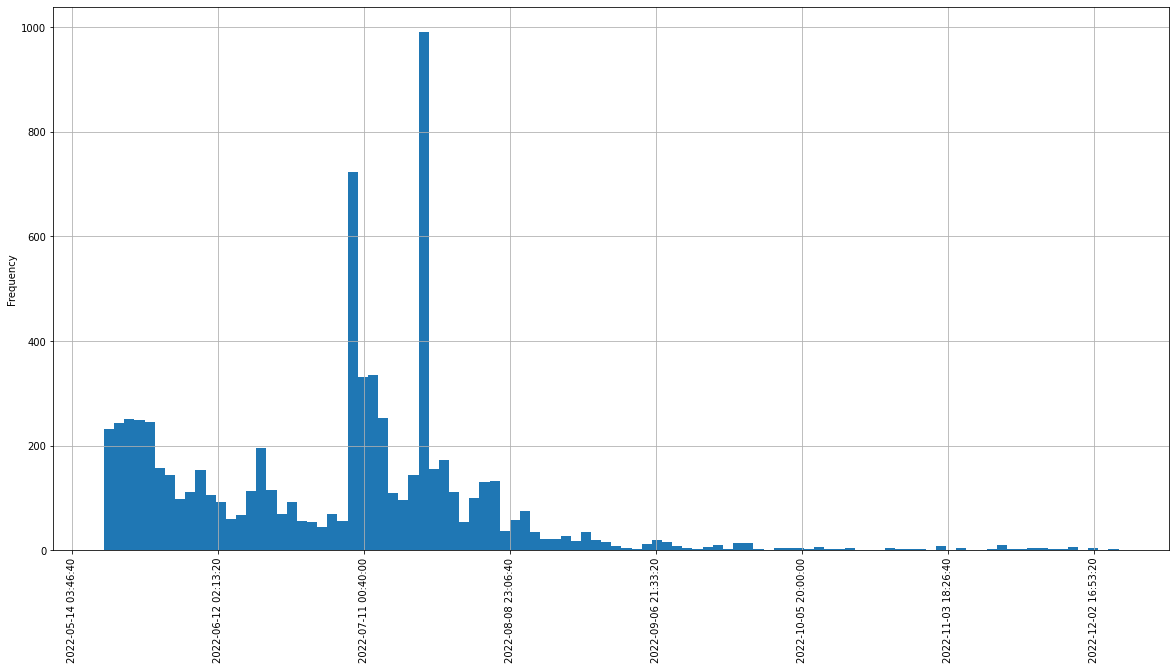

In [ ]:
# Histogram of Tweet Counts over retrieved datetime range

# CUSTOMIZE
bin_ct = 100

_ = fig, ax = plt.subplots()
_ = data_df["datetime"].astype(np.int64).plot.hist(bins=bin_ct, ax=ax)
_ = labels = ax.get_xticks().tolist()
_ = labels = pd.to_datetime(labels)
_ = ax.set_xticklabels(labels, rotation=90)
_ = plt.grid()
_ = plt.show();

# **Plot Sentiment**

In [80]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9999 to 0
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   datetime                 10000 non-null  datetime64[ns, UTC]
 1   id                       10000 non-null  int64              
 2   tweet                    10000 non-null  object             
 3   username                 10000 non-null  object             
 4   text_raw                 10000 non-null  object             
 5   text_noemoji             10000 non-null  object             
 6   text_clean               10000 non-null  object             
 7   vader                    10000 non-null  float64            
 8   textblob                 10000 non-null  float64            
 9   distilbert               10000 non-null  float64            
 10  roberta_twitter_noemoji  10000 non-null  int64              
dtypes: datetime64[ns, UTC](1), fl

In [81]:
# Reset list of models
model_ls = list(set(data_df.columns) - set(['datetime','id','tweet','username','text_raw','text_noemoji','text_clean','text_raw_type']))
model_ls = [x for x in model_ls if 'sma' not in x]
model_ls = [x for x in model_ls if 'stdscaler' not in x]
model_ls

['textblob', 'vader', 'roberta_twitter_noemoji', 'distilbert']

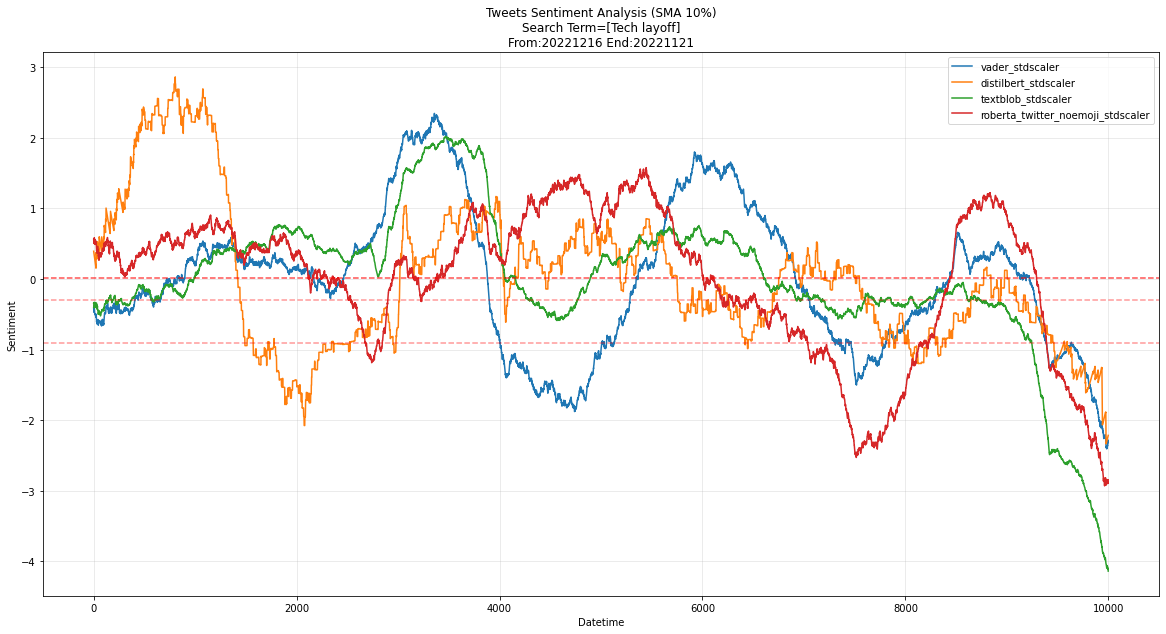

Model Raw Means

vader = 0.01
distilbert = -0.91
textblob = 0.01
roberta_twitter_noemoji = -0.29



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
#@title Enter the Sliding Window width as Percent of Novel length (default 10%, larger=smoother)

plt.rcParams['figure.figsize'] = [20, 10]

# Dict of sentiment model means
sentiment_mean_dt = {}

window_percent = 10 #@param {type:"slider", min:1, max:20, step:1}

win_per = int(window_percent/100 * data_df.shape[0])

# Reset list of models
model_ls = list(set(data_df.columns) - set(['datetime','id','tweet','username','text_raw','text_noemoji','text_clean','text_raw_type']))
model_ls = [x for x in model_ls if 'sma' not in x]
model_ls = [x for x in model_ls if 'stdscaler' not in x]

model_sma_ls = []
for amodel in model_ls:
  model_col = f'{amodel}_sma{window_percent}'
  model_sma_ls.append(model_col)
  data_df[model_col] = data_df[amodel].rolling(win_per, center=True, min_periods=1).mean()
  sentiment_mean_dt[amodel] = data_df[amodel].mean()

# roberta_twitter_raw_col = f'roberta_twitter_raw_sma{window_percent}'
# data_df[roberta_twitter_raw_col] = data_df['roberta_twitter_raw'].rolling(win_per, center=True, min_periods=1).mean()
# sentiment_mean_dt['roberta_twitter_raw'] = data_df['roberta_twitter_raw'].mean()

# Normalize Time Series to same y-range
model_norm_ls = [f'{amodel}_stdscaler' for amodel in model_ls]
# model_norm_ls

data_df[model_norm_ls] = StandardScaler().fit_transform(data_df[model_sma_ls])

# _ = data_df[model_norm_ls].plot(xticks=data_df.datetime, rot=90)
_ = data_df[model_norm_ls].plot()

_ = plt.title(f'Tweets Sentiment Analysis (SMA {window_percent}%)\nSearch Term=[{search_str}]\nFrom:{start_date} End:{end_date}')
_ = plt.ylabel('Sentiment')
# xtick_ls = [x.split(' ')[0] for x in data_df.datetime.to_list()]
# _ = plt.xticks(xtick_ls, rot=90)
_ = plt.xlabel('Datetime')
_ = plt.grid(True, alpha=0.3)
_ = plt.legend(loc='best')

model_mean_str = 'Model Raw Means\n\n'
for amodel, amean in sentiment_mean_dt.items():
  model_mean_str += f'{amodel} = {amean:.2f}\n'
  _ = plt.axhline(y = amean, label='book', color='red', linestyle='--', alpha=0.4)

filename_plot = f"twitter_plot_ensemble_{search_str.replace(' ', '_')}_{start_date}_{start_time}_{end_date}_{end_time}.png"
_ = plt.savefig(filename_plot, dpi=300)
_ = plt.show();

print(f'{model_mean_str}')

# Download Crux Point Plot file 'crux_plot.png' to your laptop
files.download(filename_plot)

# **Crux Detection**

In [88]:
#@title Which Lexicon?

Sentiment_Model = "TextBlob" #@param ["VADER", "TextBlob", "DistilBERT","RoBERTa_Twitter_NoEmoji"]

<ipython-input-96-b0aef96a6b59>:31: PeakPropertyWarning: some peaks have a width of 0
  peaks3, _ = find_peaks(x, width=width_min)
<ipython-input-96-b0aef96a6b59>:39: PeakPropertyWarning: some peaks have a width of 0
  valleys3, _ = find_peaks(x_inv, width=width_min)


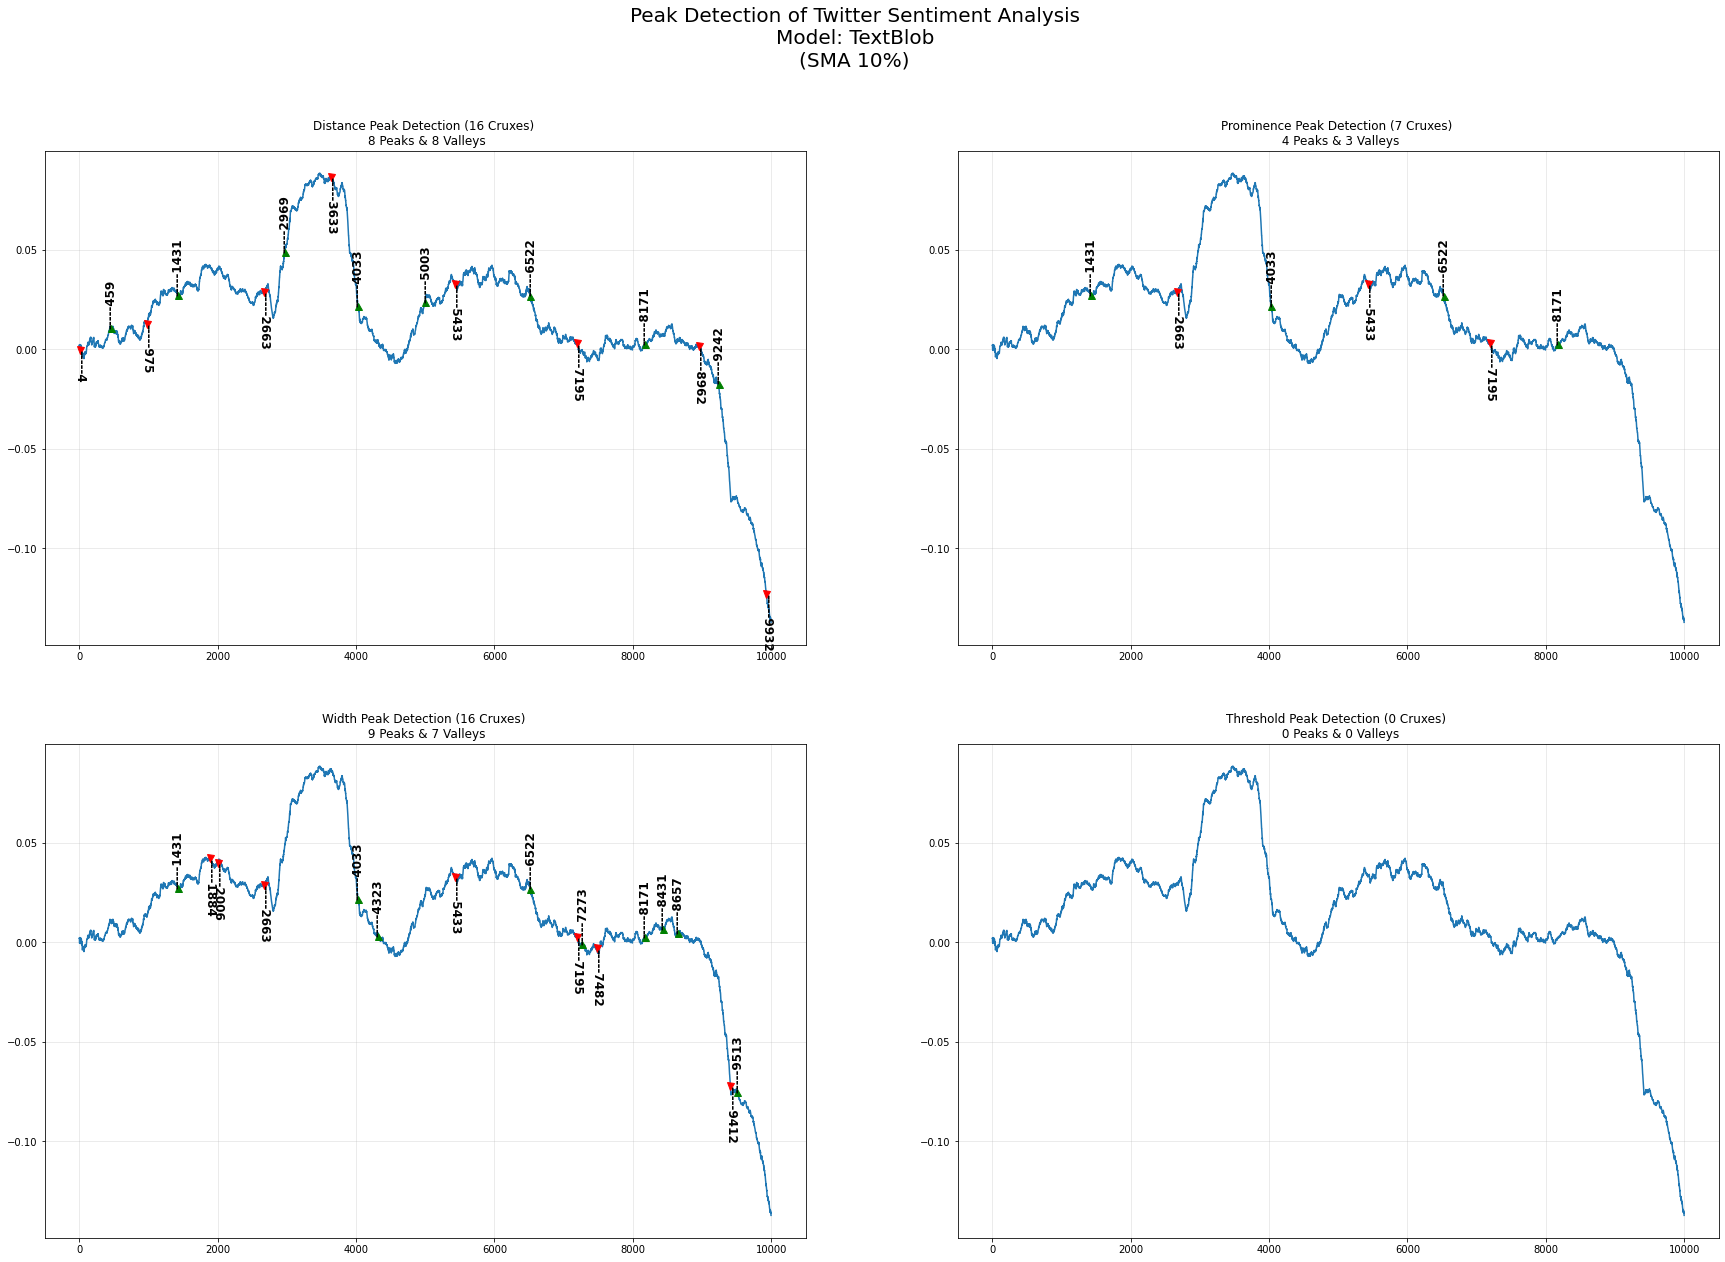

In [96]:
#@title Tune the main Hyperparameter for each of the 4 Peak Detection Algorithms:

Distance_Min = 970 #@param {type:"slider", min:50, max:1000, step:10}
Prominence_Min = 0.011 #@param {type:"slider", min:0.001, max:0.05, step:0.001}
Width_Min = 110 #@param {type:"slider", min:10, max:500, step:5}
Threshold_Min = 0.002 #@param {type:"slider", min:0.001, max:0.01, step:0.001}

plt.rcParams['figure.figsize'] = [30, 20]

model_name = f'{Sentiment_Model.lower()}_sma{window_percent}'
# print(f'Plotting: {model_name}\n')

x = data_df[model_name]
data_df[model_name].plot()

# Peak Algo #1 (by Distance)
distance_min = Distance_Min # 750

# Peak Algo #2 (by Prominence)
prominence_min = Prominence_Min # 0.01

# Peak Algo #3 (by Width)
width_min = Width_Min # 175

# Peak Algo #4 (by Threshold)
threshold_min = Threshold_Min # 0.001


peaks, _ = find_peaks(x, distance=distance_min)
peaks2, _ = find_peaks(x, prominence=prominence_min)      # BEST!
peaks3, _ = find_peaks(x, width=width_min)
peaks4, _ = find_peaks(x, threshold=threshold_min)     # Required vertical distance to its direct neighbouring samples, pretty useless


x_inv = pd.Series([-x for x in data_df[model_name].to_list()])

valleys, _ = find_peaks(x_inv, distance=distance_min)
valleys2, _ = find_peaks(x_inv, prominence=prominence_min)      # BEST!
valleys3, _ = find_peaks(x_inv, width=width_min)
valleys4, _ = find_peaks(x_inv, threshold=threshold_min)     # Required vertical distance to its direct neighbouring samples, pretty useless


_ = plt.subplot(2, 2, 1)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Distance Peak Detection ({len(peaks)+len(valleys)} Cruxes) \n {len(peaks)} Peaks & {len(valleys)} Valleys')
_ = plt.plot(peaks, x[peaks], "^g", markersize=7)
_ = plt.plot(valleys, x[valleys], "vr", markersize=7)
for x_val in peaks:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')

_ = plt.subplot(2, 2, 2)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Prominence Peak Detection ({len(peaks2)+len(valleys2)} Cruxes) \n {len(peaks2)} Peaks & {len(valleys2)} Valleys')
_ = plt.plot(peaks2, x[peaks2], "^g", markersize=7)
_ = plt.plot(valleys2, x[valleys2], "vr", markersize=7)
for x_val in peaks2:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys2:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')


_ = plt.subplot(2, 2, 3)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Width Peak Detection ({len(peaks3)+len(valleys3)} Cruxes) \n {len(peaks3)} Peaks & {len(valleys3)} Valleys')
_ = plt.plot(valleys3, x[valleys3], "vr", markersize=7)
_ = plt.plot(peaks3, x[peaks3], "^g", markersize=7)
for x_val in peaks3:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys3:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')


_ = plt.subplot(2, 2, 4)
_ = plt.grid(True, alpha=0.3)
_ = plt.plot(x)
_ = plt.title(f'Threshold Peak Detection ({len(peaks4)+len(valleys4)} Cruxes) \n {len(peaks4)} Peaks & {len(valleys4)} Valleys')
_ = plt.plot(valleys4, x[valleys4], "vr", markersize=7)
_ = plt.plot(valleys4, x[valleys4], "^g", markersize=7)
for x_val in peaks4:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys4:
  _ = plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')

_ = plt.suptitle(f'Peak Detection of Twitter Sentiment Analysis\nModel: {Sentiment_Model}\n(SMA {window_percent}%)', fontsize=20)
_ = plt.grid(True, alpha=0.3)

_ = plt.show()

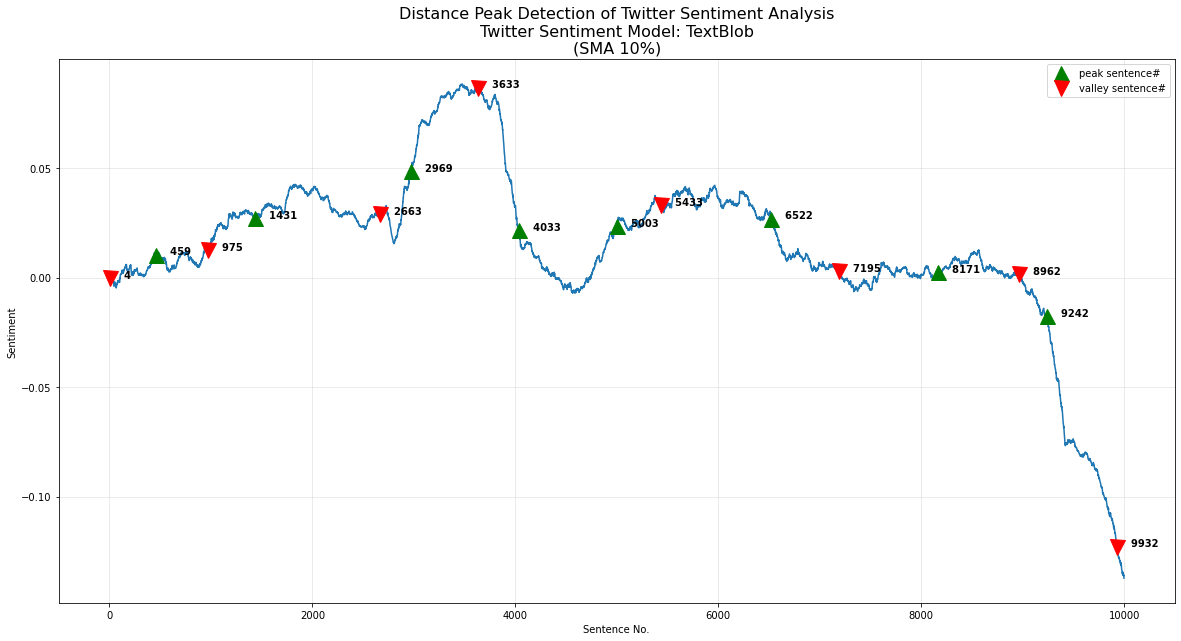

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



     >>>>> SAVED PLOT TO FILE: [twitter_plot_cruxes_textblob_Tech_layoff_20221216_153341_20221121_212715.png] <<<<<


In [97]:
#@title Select a Peak Detection Algorithms to View in Detail (usually Distance or Width is best):

plt.rcParams['figure.figsize'] = [20, 10]

Peak_Algorithm = "Distance" #@param ["Distance", "Prominence", "Width", "Threshold"]

if Peak_Algorithm == 'Distance':
  peaks = peaks
  valleys = valleys
elif Peak_Algorithm == 'Prominence':
  peaks = peaks2
  valleys = valleys2  
elif Peak_Algorithm == 'Width':
  peaks = peaks3
  valleys = valleys3
else:
  # Assume Peak_Algorithm == 'Threshold'
  peaks = peaks4
  valleys = valleys4

# model_name = f'{Sentiment_Model.lower()}_sma10'

# x = novel_clean_df[model_name]

# peaks2, _ = find_peaks(x, prominence=peak_prominence)  

# x_inv = pd.Series([-x for x in novel_clean_df[model_name].to_list()])
# valleys2, _ = find_peaks(x_inv, prominence=peak_prominence)     

_ = plt.plot(x)
_ = plt.plot(peaks, x[peaks], "^g", markersize=15, label='peak sentence#')
_ = plt.plot(valleys, x[valleys], "vr", markersize=15, label='valley sentence#')
for x_val in peaks:
  _ = plt.text(x_val, x[x_val], f'    {x_val}', horizontalalignment='left', size='medium', color='black', weight='semibold')
for x_val in valleys:
  _ = plt.text(x_val, x[x_val], f'    {x_val}', horizontalalignment='left', size='medium', color='black', weight='semibold')
_ = plt.title(f'{Peak_Algorithm} Peak Detection of Twitter Sentiment Analysis\nTwitter Sentiment Model: {Sentiment_Model}\n(SMA {window_percent}%)', fontsize=16)
_ = plt.ylabel('Sentiment')
_ = plt.xlabel('Sentence No.')
_ = plt.legend(loc='best')
_ = plt.grid(True, alpha=0.3)

filename_plot = f"twitter_plot_cruxes_{Sentiment_Model.lower()}_{search_str.replace(' ', '_')}_{start_date}_{start_time}_{end_date}_{end_time}.png"
_ = plt.savefig(filename_plot, dpi=300)
_ = plt.show();

# Download Crux Point Plot file 'crux_plot.png' to your laptop
files.download(filename_plot)

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_plot}] <<<<<')

# **Get Context around Crux Points**

In [98]:
#@title How many Sentences around Crux Point do you want to view for context?

Crux_Sentence_Context_Count = 19 #@param {type:"slider", min:1, max:20, step:1}


In [99]:
# Print Context around each Sentiment Peak

output_ls = []

halfwin = int(Crux_Sentence_Context_Count/2)
crux_sents_ls = []
nl = '\n'

print('==================================================')
print('============     Peak Crux Points   ==============')
print('==================================================\n\n')

output_ls.append('==================================================')
output_ls.append('============     Peak Crux Points   ==============')
output_ls.append('==================================================\n\n')

# for i, apeak in enumerate(peaks2):
for i, apeak in enumerate(peaks):
  print(f'Processing Peak #{i}...')
  crux_sents_ls = []
  indx_start = apeak-halfwin
  indx_start = max(indx_start, 0)
  indx_end = apeak+halfwin
  indx_end = min(indx_end, data_df.shape[0])
  for sent_idx in range(indx_start, indx_end):
    sent_cur = data_df.iloc[sent_idx].text_raw
    if sent_idx == apeak:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)
  
  # context_ls = data_df.iloc[apeak-halfwin:apeak+halfwin].text_raw
  print(f"Peak #{i} at Sentence #{apeak}:\n\n{nl.join(crux_sents_ls)}\n\n\n")
  output_ls.append(f"Peak #{i} at Sentence #{apeak}:\n\n{nl.join(crux_sents_ls)}\n\n\n")

print('==================================================')
print('===========     Crux Valley Points    ============')
print('==================================================\n\n')

output_ls.append('==================================================')
output_ls.append('===========     Crux Valley Points    ============')
output_ls.append('==================================================\n\n')

# for i, avalley in enumerate(valleys2):
for i, avalley in enumerate(valleys):
  print(f'Processing Valley #{i}')
  crux_sents_ls = []
  for sent_idx in range(avalley-halfwin,avalley+halfwin+1):
    sent_cur = data_df.iloc[sent_idx].text_raw
    if sent_idx == avalley:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)

  # context_ls = novel_df.iloc[avalley-halfwin:avalley+halfwin].text_raw
  print(f"Valley #{i} at Sentence #{avalley}:\n\n{nl.join(crux_sents_ls)}\n\n\n")
  output_ls.append(f"Valley #{i} at Sentence #{avalley}:\n\n{nl.join(crux_sents_ls)}\n\n\n")

filename_cruxes = f"twitter_cruxes_context_{Sentiment_Model.lower()}_{search_str.replace(' ', '_')}_{start_date}_{start_time}_{end_date}_{end_time}.txt" 

output_str = ' '.join(output_ls)

with open(filename_cruxes, 'w') as f:
    f.write(output_str)

# Download Crux Point Report file 'cruxes.txt' to your laptop
files.download(filename_cruxes)

============     Peak Crux Points   ==============


Processing Peak #0...
Peak #0 at Sentence #459:

Elon Musk says Twitter is done with layoffs and ready to hire again 

#technology #tech #technews #teknocks
via /r/technology https://t.co/3N2NOqUDAm
@shaktischild Tech layoffs?
Jaguar Land Rover courts coders caught in big tech layoffs https://t.co/sS4BwfMItb via @theregister
tech layoffs are crazy but they were to be expected. twitter layoffs however, were egregious and highly counterproductive
In Tech Layoff Season, Google Preps For A Purge Too: Target Set At 10,000 https://t.co/nsFtAsV0cG https://t.co/BB2BtNOA5e
#Alphabet, #Google's parent company, is reportedly planning to lay off 10,000 "low-performing" employees, or 6% of its workforce, as part of the Big Tech layoff season, which has already begun with #Meta, #Amazon, #Twitter, #Salesforce, and others.

 #bigwoice #techinsider https://t.co/edNzNZJaFz
Tech Industry Layoffs Are Accelerating. What Does That Mean? https://t.co/cyO9

52452

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
!cat $filename_cruxes

================================================== ============     Peak Crux Points   ============== ==================================================

 Peak #0 at Sentence #459:

Elon Musk says Twitter is done with layoffs and ready to hire again 

#technology #tech #technews #teknocks
via /r/technology https://t.co/3N2NOqUDAm
@shaktischild Tech layoffs?
Jaguar Land Rover courts coders caught in big tech layoffs https://t.co/sS4BwfMItb via @theregister
tech layoffs are crazy but they were to be expected. twitter layoffs however, were egregious and highly counterproductive
In Tech Layoff Season, Google Preps For A Purge Too: Target Set At 10,000 https://t.co/nsFtAsV0cG https://t.co/BB2BtNOA5e
#Alphabet, #Google's parent company, is reportedly planning to lay off 10,000 "low-performing" employees, or 6% of its workforce, as part of the Big Tech layoff season, which has already begun with #Meta, #Amazon, #Twitter, #Salesforce, and others.

 #bigwoice #techinsider https://t.co/edNzNZJaF

# **END OF NOTEBOOK**